# Step 3 - Exploratory Data Analysis

## 3.1 Contents<a id='3.1_Contents'></a>
* [Step 3 - Exploratory data analysis](#Step_3_-_Exploratory_data_analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Overview](#3.2_Overview)
  * [3.3 Scope of analysis](#3.3_Scope_of_analysis)
  * [3.4 Exploratory data analysis](#3.4_Exploratory_data_analysis)
    * [3.4.1 Load of data](#3.4.1_Load_of_data)
    * [3.4.2 The individual players database](#3.4.2_The_individual_players_database)
     * [3.4.2.1 Impute of missing values](#3.4.2.1_Impute_of_missing_values)
    * [3.4.3 The game duration](#3.4.3_The_game_duration)
    * [3.4.4 The heroes analysis - metrics](#3.4.4_The_heroes_analysis_-_metrics)
      * [3.4.4.1 Gold vs Sources of gold](#3.4.4.1_Gold_vs_Sources_of_gold)
      * [3.4.4.2 Gold vs Sources of experience](#3.4.4.2_Gold_vs_Sources_of_experience)
      * [3.4.4.3 Gold vs Type of damage dealt](#3.4.4.3_Gold_vs_Type_of_damage_dealt)    
    * [3.4.5 Clustering of heroes](#3.4.5_Clustering_of_heroes)
      * [3.4.5.1 Clustering by function](#3.4.4.1_Clustering_by_function)
      * [3.4.5.2 Clustering by farm dependancy](#3.4.4.2_Clustering_by_farm_dependancy)
      * [3.4.5.3 Clustering by powerspike](#3.4.4.3_Clustering_by_powerspike)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)

## 3.2 Overview
In this step, we will focus on the data of matches to understand some of the game dynamics, and how do they seem to affect the win or lose of a team.

Due to the complexity of the game, with many dimensions to analyze, from macrostrategy to microstrategy, to heroes abilities and statistics, to items, it really requires a holistic approach to fully understand the impact of each action in the winning chances of a team.

It is necessary to introduce some basic dynamics of the game before we proceed to analyze the data.

### Some important concepts and game dynamics
#### The relationship between gold (items) and experience (levels)

The **gold** and **experience** in the game is obtained by players through different ways. Players can "last hit" neutral or enemy creeps, take down enemy defensive structures or kill enemy heroes. If a player helps a teammate in killing an enemy heroe, this is computed as an "assist" and also gives some gold and experience to the player. In general basis, it gives more gold and experience to kill enemy heroes than to last hit creeps. However, it is also riskier as the player could die in the process, which would give gold and experience to the enemy player.

But, what do players want to earn gold and experience in first place?

The **experience** raises the level of the hero, which unlocks new abilities. With each level the player can unlock one of it's hero abilities, up to 4 (Abilities A1, B1, C1 and D1). Once the hero has unlocked their 4 abilities, they can upgrade them 4 times each, to the point where there are 4 abilities at level 4 each one of them (A4, B4, C4, D4), after which the hero's abilities have been completely developed.

The **gold** is used by the player to buy items. Items have active (e.g. if activated the hero runs faster for 5 seconds) or passive (e.g. the hero armor is increased +5 points) abilities which make heroes stronger, item prices vary a lot. The more expensive an item is, the stronger it makes the hero that has it, by providing it with active and/or passive abilities.

#### The "power spike" of heroes (Early/Mid Game or Mid/Late Game)

Based on how much experience (levels) and/or gold (items) a hero needs to become impactful, we can split heroes into:

* **Early/Mid game heroes** - In a race, they could assimilate to "sprinters". Heroes that need less levels and/or items to become impactful. However, these heroes tend to lose impact as the game advances, because their abilities do not escalate so well in long games. Therefore, these heroes have the highest impact in shorter games.


* **Mid/Late game heroes** - In a race, they could assimilate to "long distance runners". Heroes that need more levels and/or items to become impactful. When they have levels and/or items, they are very strong, but they are weak without levels or items. Therefore, these heroes have the highest impact in longer games.


#### The relationship between "roles" and  "positions"

Below there is some lines to introduce the theoretical positions that exist in the game.

* As a **core role**, a player can play one of these 3 positions:

  * **Carry** - Require many levels and items to make an impact on the game. They spend a greater time of the game last hitting creeps to gain gold and experience. These heroes are specially good at producing damage.

  * **Mid** - Require moderate levels and items to make an impact on the game. Similar to carry with the exception that these heroes usually activate earlier in game because they are not so dependant on items as the carries.
  
  * **Offlane** - Require basic/moderate levels and items to make impact on the game. These heroes normally do not deal a lot of damage compared with carries and mids, but have abilities that are powerful, so they do not depend on items so much.


* As a **support rol**, a player can play one of these 2 positions:

  * **Soft support** - Require few levels and items to make an impact on the game. They spend most of the game trying to ambush enemy heroes to obtain kills. They usually activate early and have abilities that allow them to kill or assist kills.

  * **Hard support** - Require few levels and almost no items to make an impact on the game. They spend most of the game supporting their team with items that will give vision on the map.


## 3.3 Scope of Analysis

It is necessary to highlight that we are interested in predicting what team will win based on information that is available at the beginning of the game. Therefore, the model will not be based on information that we have at end game, such as hero damage dealt, amount of gold earned, and so on. On the opposite, we will focus just on the information available at the beginning of the game, which is, the heroes that each team has selected.

To add some practical functionality to the analysis, we will try to induce what strategies would opmitize the winning chances of each team based on their draft of heroes. For example, we will try to make recommendations to the team such as if they should try to win the game early and force to push structures and kill enemy heroes, or they should do later on and play conservative in the early game.

Based on this, our EDA will be focused on:

* **How to categorize heroes based on their powerspike:** This is, can we make categories of clusters of heroes based on metrics of their game? In particular, can we define if a given hero is an early hero, mid game hero or late game hero?


* **Evolution of the hero:** Based on such categorization (early, mid or late hero), can we predict what the duration of the game will be? and if so, can we use this information as a variable in the model to modulate what our winning chances will be if we follow different strategies?


Note (The items): We are aware that items play a huge impact in individual and team's performance. However, we only know what items a hero purchased at end game, therefore, it would be variable leaking if we introduced this information in the model to predict winning chances.


In summary, we predict that our model will not have so much predictive power as a model that introduced items as a variable. However, we expect that the results that we will obtain will provide a more pragmatic perspective of how does the game looks like at the beginning of the game, where players do not know what items will they purchase yet, or what items the enemy team will purchase. However, based on their draft and enemy team draft or heroes, they could already define a common strategy to follow.

## 3.4 Exploratory Data Analysis

### 3.4.1 Load of Data
#### Import Packages

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

#### Read CSV files created in the Data Wrangling

* heroes - contains information about heroes names and ids
* items - contains information about items names and ids
* players - contains metrics of each player at the end of the game
* players_time - contains the evolution of gold, experience and levels for each player by minute
* match - what team won each game and information about duration of the game and health of defense structures at end game.

In [118]:
heroes = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\heroes.csv')
items = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\items.csv')
players = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\players.csv')
players_time = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\2.Data Wrangling\player_time.csv')
match = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Dota 2 - Capstone Project\0.RawData\match.csv')

### 3.4.2 The individual players database

We will firstly analize the information about players contained in 50.000 Dota 2 games (this is, 500k players). We will use the information of the 500k players to map what heroes do best in short, mid or long game durations.

#### 3.4.2.1 Impute of missing values

To analyze end game information, we will focus on 'players' dataframe.

In [119]:
players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,83.0,50.0,-957.0,NaN,212.0,3120.0,5145.0,1087.0,400.0
1,0,1,51,1,2954,17760,494,659,13,3,...,2683.0,671.0,395.0,-1137.0,NaN,1650.0,3299.0,6676.0,4317.0,937.0
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,453.0,259.0,-1436.0,-1015.0,NaN,3142.0,2418.0,3697.0,400.0
3,0,2,11,3,1179,22505,599,605,8,4,...,894.0,293.0,100.0,-2156.0,NaN,938.0,4714.0,4104.0,10432.0,400.0
4,0,3,67,4,3307,23825,613,762,20,3,...,NaN,62.0,NaN,-1437.0,-1056.0,4194.0,3217.0,7467.0,9220.0,400.0


It is lacking information about what team won the game, the duration of the game.. We will also bring information about the game from "match" dataframe.

In [120]:
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


We have information about each individual player performance.

However, we are missing the information about the status of their defensive structures at end game, this is, how "destroyed" were their defenses at the end game, for each team, regardless of who won the game.

Therefore, we will add this information to the players dataframe.

In [121]:
players = players.merge(match, on = 'match_id')

We will drop some columns that we are not interested in.

In [122]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_sell', 'gold_destroying_structure', 'gold_killing_heros',
       'gold_killing_creeps', 'gold_killing_roshan', 'start_time', 'duration',
       'tower_status_radiant', 'tower_status_dire', 'barracks_status_dire',
       'barracks_status_radiant', 'first_blood_time', 'game_mode',
       'radiant_win', 'negative_votes', 'positive_votes', 'cluster'],
      dtype='object')

In [123]:
players = players.drop(['negative_votes', 'positive_votes', 'cluster'], axis=1)

First we will check for missing values in the dataframe, with the aim to clean the data and be able to make EDA on it.

In [124]:
players.isnull().sum()

match_id                          0
account_id                        0
hero_id                           0
player_slot                       0
gold                              0
gold_spent                        0
gold_per_min                      0
xp_per_min                        0
kills                             0
deaths                            0
assists                           0
denies                            0
last_hits                         0
stuns                             0
hero_damage                       0
hero_healing                      0
tower_damage                      0
item_0                            0
item_1                            0
item_2                            0
item_3                            0
item_4                            0
item_5                            0
level                             0
leaver_status                     0
xp_hero                        1883
xp_creep                         68
xp_roshan                   

Checking the missing values, we see that some observations are missing. We need to understand if such records are zeros or missing values.

* In case their are zeros, we will substitute them by zeros.
* In case that their are missing values, we should impute their values with the the median. 

As players have different skill levels, the mean will be very different from the median value in terms of analyzing hero performance.

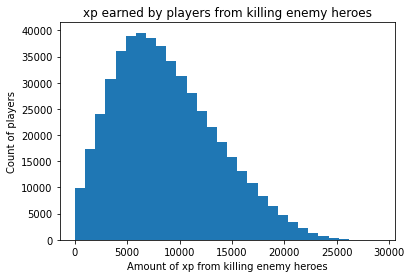

In [125]:
#We plot xp_hero to check for missing values. xp_hero is the experience earned by player for killing heroes.
plt.hist(players.xp_hero, bins=30)
plt.title('xp earned by players from killing enemy heroes')
plt.xlabel('Amount of xp from killing enemy heroes')
plt.ylabel('Count of players')
plt.show()

The distribution of players is slightly skewed to the left, with no significant outliers.

In [126]:
#The minimum value is 25, close to 0, so we are going to impute the zero value for the missing rows.
print(players.xp_hero.min())
players.xp_hero = players.xp_hero.fillna(0)
#check that there are not missing values for xp_hero
print(players.xp_hero.isnull().sum())

25.0
0


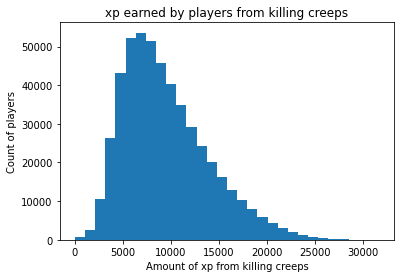

In [127]:
#We plot and analyze xp_creep in the same way. This is experience from killing creeps
plt.hist(players.xp_creep, bins=30)
plt.title('xp earned by players from killing creeps')
plt.xlabel('Amount of xp from killing creeps')
plt.ylabel('Count of players')
plt.show()

The distribution is slightly skewed to the left, with not significant outliers.

In [128]:
#The minimum value is 25, close to 0, so we are going to impute the zero value for the missing rows.
print(players.xp_creep.min())
players.xp_creep = players.xp_creep.fillna(0)
#check that there are not missing values for xp_hero
print(players.xp_creep.isnull().sum())

10.0
0


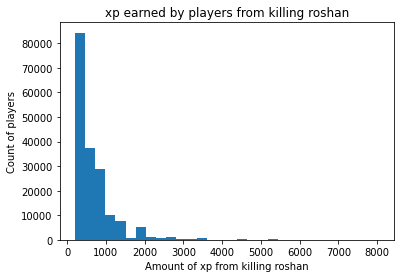

In [129]:
#We plot and analyze xp_roshan in the same way. This is experience from killing the roshan, a neutral beast.
plt.hist(players.xp_roshan, bins=30)
plt.title('xp earned by players from killing roshan')
plt.xlabel('Amount of xp from killing roshan')
plt.ylabel('Count of players')
plt.show()

The distribution is very skewed to the left. There are significant outliers. However, this could make sense. The roshan is a neutral creep that gives much more gold and experience that a normal creep. Each time it gets killed it revives after some minutes. The more times it's killed, the more xp and gold it gives when killed. In some games we could expect that players kill the roshan many times and therefore, have a lot of xp earned from the roshan.

In [130]:
#The minimum value is close to zero.
print(players.xp_roshan.min())
players.xp_roshan = players.xp_roshan.fillna(0)
#check that there are not missing values for xp_hero
print(players.xp_roshan.isnull().sum())

198.0
0


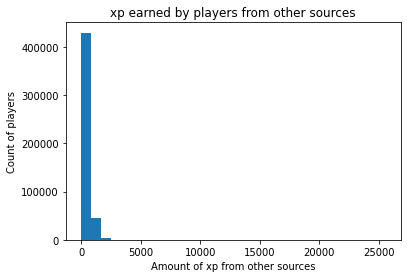

In [131]:
#We plot and analyze xp_other. Seems to be zero in mmost cases. We will impute zero.
plt.hist(players.xp_other, bins=30)
plt.title('xp earned by players from other sources')
plt.xlabel('Amount of xp from other sources')
plt.ylabel('Count of players')
plt.show()

The distribution is very skewed to the left. With some outliers. as max values. Again, this is a reason why analyzing heroes by the median player values is the best proxy to the standard player.

In [132]:
#The minimum value is close to zero.
print(players.xp_other.min())
players.xp_other = players.xp_other.fillna(0)
#check that there are not missing values for xp_hero
print(players.xp_other.isnull().sum())

1.0
0


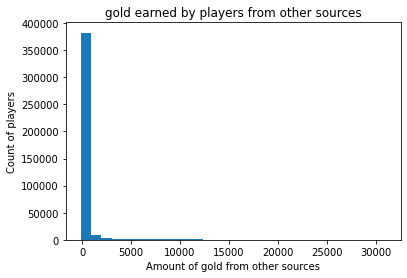

In [133]:
#We plot and analyze gold_other. seems to be zero in most cases.
plt.hist(players.gold_other, bins=30)
plt.title('gold earned by players from other sources')
plt.xlabel('Amount of gold from other sources')
plt.ylabel('Count of players')
plt.show()

The distribution is very skewed to the left, with some outlier values at the right tail.

In [134]:
#The minimum value is close to zero.
print(players.gold_other.min())
players.gold_other = players.gold_other.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_other.isnull().sum())

-100.0
0


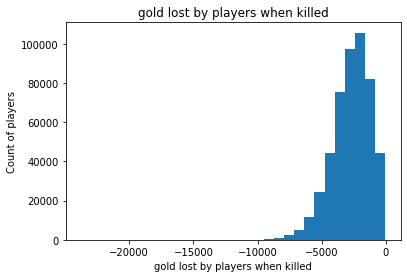

In [135]:
#We plot and analyze gold_other. seems to be zero in most cases.
plt.hist(players.gold_death, bins=30)
plt.title('gold lost by players when killed')
plt.xlabel('gold lost by players when killed')
plt.ylabel('Count of players')
plt.show()

It's a slightly right skewed distribution with some outliers in the left tail.

In [136]:
#Max Value -29, seem to be that heroes give gold to enemy when they die. No zeros, we will impute with zeros.
print(players.gold_death.max())
players.gold_death = players.gold_death.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_death.isnull().sum())

-29.0
0


Text(0, 0.5, 'Count of players')

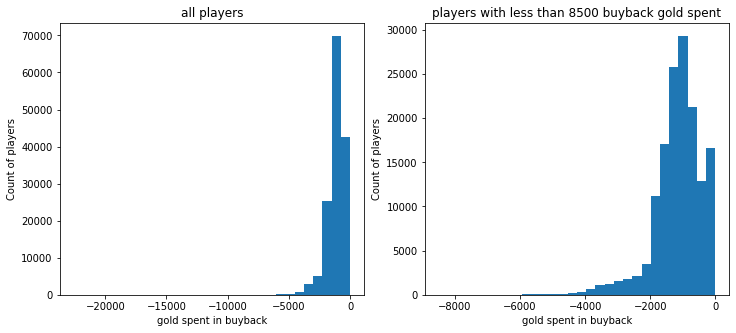

In [137]:
#We plot and analyze gold_buyback. seems to be zero in most cases.

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(players.gold_buyback, bins=30)
ax1.set_title('all players')
ax1.set_xlabel('gold spent in buyback')
ax1.set_ylabel('Count of players')
ax2.hist(players.gold_buyback, bins=30, range = (-8500,0))
ax2.set_title('players with less than 8500 buyback gold spent')
ax2.set_xlabel('gold spent in buyback')
ax2.set_ylabel('Count of players')


The distribution is skewed to the right, with some outliers in the left tail.

In [138]:
#Gold paid to revive from death instantaneously instead of waiting countdown. Max value is -5, we will impute with zero.
print(players.gold_buyback.max())
players.gold_buyback = players.gold_buyback.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_buyback.isnull().sum())

-5.0
0


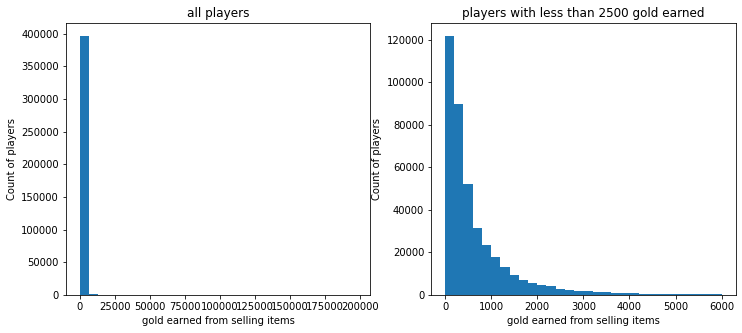

In [139]:
#We plot and analyze gold_sell. seems to be zero in most cases.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(players.gold_sell, bins=30)
ax1.set_title('all players')
ax1.set_xlabel('gold earned from selling items')
ax1.set_ylabel('Count of players')
ax2.hist(players.gold_sell, bins=30, range = (0,6000))
ax2.set_title('players with less than 2500 gold earned')
ax2.set_xlabel('gold earned from selling items')
ax2.set_ylabel('Count of players')

plt.show()

The distribution is very skewed to the left, with outliers in the right tail.

In [140]:
#Gold from items sold on shop. Most values are close to zero. Min value is 15, we will impute zero.
print(players.gold_sell.min())
players.gold_sell = players.gold_sell.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_sell.isnull().sum())

15.0
0


In [141]:
#There seem to be some outlier values
players.gold_sell.sort_values(ascending=False).head(35)

403449    197237.0
403448    159320.0
438820     85154.0
335517     71658.0
412630     64414.0
104218     59437.0
433687     47672.0
153451     36444.0
355453     34087.0
332079     32249.0
113010     31454.0
204686     29710.0
249845     29150.0
77194      28933.0
249846     28150.0
397687     27362.0
299315     24200.0
99469      23624.0
25881      21374.0
230006     21221.0
287669     19989.0
114062     19756.0
22488      19749.0
156272     19662.0
206018     19537.0
24338      19279.0
45761      18450.0
248636     18427.0
99193      17968.0
137775     17774.0
387755     17735.0
9645       17649.0
486363     17508.0
99468      17149.0
60847      17112.0
Name: gold_sell, dtype: float64

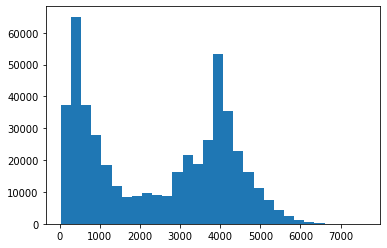

In [142]:
#We plot and analyze gold_sell. seems to be zero in most cases.
plt.hist(players.gold_destroying_structure, bins=30)
plt.show()

This distribution shows two modes. It could be explained by the fact that the winning team broke all towers and the losing team didn't. If we assume around 50% of the games are won by each team (and their players), it could make sense that while around 50% of the players destroy all towers and win, around 50% destroy only part of the enemy towers, and therefore earn less gold from this.

In [143]:
#Gold from destroying structures. Min value is 32. We will impute with zero.
print(players.gold_destroying_structure.min())
players.gold_destroying_structure = players.gold_destroying_structure.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_destroying_structure.isnull().sum())

32.0
0


Text(0, 0.5, 'Count of players')

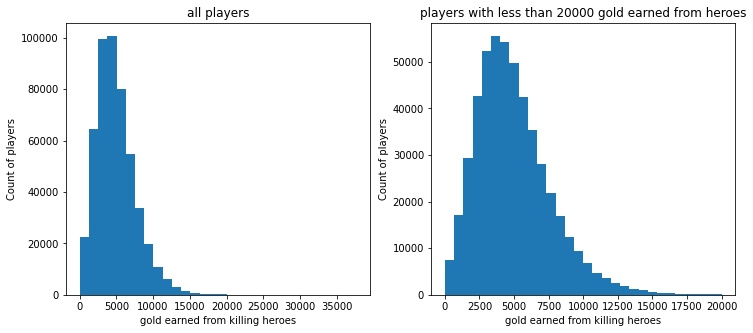

In [144]:
#We plot and analyze gold_sell. seems to be zero in most cases.

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(players.gold_killing_heros, bins=30)
ax1.set_title('all players')
ax1.set_xlabel('gold earned from killing heroes')
ax1.set_ylabel('Count of players')
ax2.hist(players.gold_killing_heros, bins=30, range = (0,20000))
ax2.set_title('players with less than 20000 gold earned from heroes')
ax2.set_xlabel('gold earned from killing heroes')
ax2.set_ylabel('Count of players')

This distriution is skewed to the left with some outliers in the right tail.

In [145]:
#Gold from killing enemies, min value is 18, we will impute with zero.
print(players.gold_killing_heros.min())
players.gold_killing_heros = players.gold_killing_heros.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_killing_heros.isnull().sum())

18.0
0


Text(0, 0.5, 'Count of players')

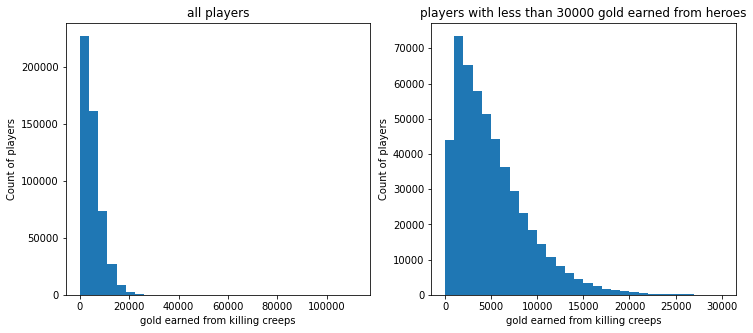

In [146]:
#We plot and analyze gold_sell. seems to be zero in most cases.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(players.gold_killing_creeps, bins=30)
ax1.set_title('all players')
ax1.set_xlabel('gold earned from killing creeps')
ax1.set_ylabel('Count of players')
ax2.hist(players.gold_killing_creeps, bins=30, range = (0,30000))
ax2.set_title('players with less than 30000 gold earned from heroes')
ax2.set_xlabel('gold earned from killing creeps')
ax2.set_ylabel('Count of players')

The distribution is skewed to the left with outliers in the right tail. Also many players barely earn gold from killing creeps.

In [147]:
#Gold from killing enemies, min value is 18, we will impute with zero.
print(players.gold_killing_creeps.min())
players.gold_killing_creeps = players.gold_killing_creeps.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_killing_creeps.isnull().sum())

18.0
0


Text(0, 0.5, 'Count of players')

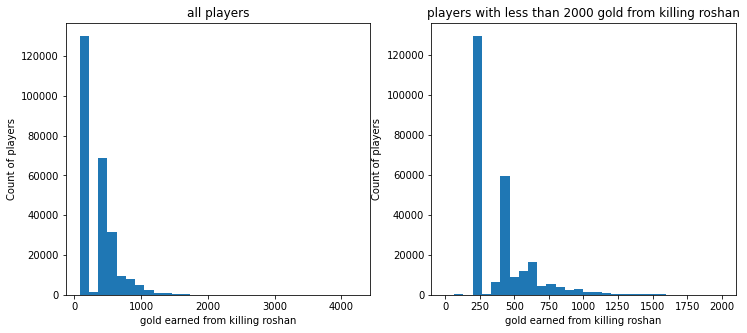

In [148]:
#We plot and analyze gold_sell. seems to be zero in most cases.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(players.gold_killing_roshan, bins=30)
ax1.set_title('all players')
ax1.set_xlabel('gold earned from killing roshan')
ax1.set_ylabel('Count of players')
ax2.hist(players.gold_killing_roshan, bins=30, range = (0,2000))
ax2.set_title('players with less than 2000 gold from killing roshan')
ax2.set_xlabel('gold earned from killing roshan')
ax2.set_ylabel('Count of players')

The distribution is very skewed to the lef, with many outliers to the right. Most players earn 250 from killing roshan.

In [149]:
#Gold from killing enemies, min value is 18, we will impute with zero.
print(players.gold_killing_roshan.min())
players.gold_killing_roshan = players.gold_killing_roshan.fillna(0)
#check that there are not missing values for xp_hero
print(players.gold_killing_roshan.isnull().sum())

80.0
0


In [150]:
#We now have a clean dataframe with values impute zero.
players.isnull().sum()

match_id                     0
account_id                   0
hero_id                      0
player_slot                  0
gold                         0
gold_spent                   0
gold_per_min                 0
xp_per_min                   0
kills                        0
deaths                       0
assists                      0
denies                       0
last_hits                    0
stuns                        0
hero_damage                  0
hero_healing                 0
tower_damage                 0
item_0                       0
item_1                       0
item_2                       0
item_3                       0
item_4                       0
item_5                       0
level                        0
leaver_status                0
xp_hero                      0
xp_creep                     0
xp_roshan                    0
xp_other                     0
gold_other                   0
gold_death                   0
gold_buyback                 0
gold_sel

We add the information of hero names to the dataframe.

In [151]:
players = players.merge(heroes, on = 'hero_id')

In [152]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_sell', 'gold_destroying_structure', 'gold_killing_heros',
       'gold_killing_creeps', 'gold_killing_roshan', 'start_time', 'duration',
       'tower_status_radiant', 'tower_status_dire', 'barracks_status_dire',
       'barracks_status_radiant', 'first_blood_time', 'game_mode',
       'radiant_win', 'localized_name'],
      dtype='object')

At this point, we have a clean dataframe in which we have the information, at end game, of several metrics per player. We have information about the heroes that they used, how much gold, xp, kills, deaths, assists they had. These are all useful metrics to observe.

### 3.4.3 The game duration

We want to know the game duration to split the games between early games, avarage games and long games. This split will be useful later on to compare the performance of certain heroes in subsets of games. We would expect that a team composed mainly of early or mid heroes will perform better (win more times) in short games, and a team composed of mid-late heroes perform better on long games.

In [153]:
#convert duration in minutes
players.duration = (players.duration /60)

Text(0, 0.5, 'count of players')

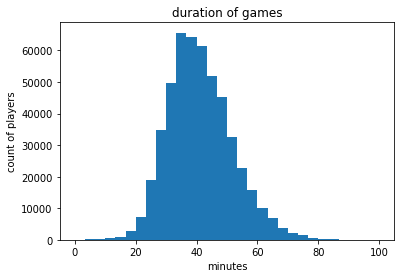

In [154]:
plt.hist(players.duration, bins=30, range=(0,100))
plt.title('duration of games')
plt.xlabel('minutes')
plt.ylabel('count of players')

In [155]:
#we split the original dataframe into short, medium and long games
#short games are games that last less than 35 minutes
#average games are games that last between 35 and 45 minutes
#long games are games that last more than 45 minutes
players['typeofgame'] = np.where(players['duration'].between(0,35, inclusive=False), "short game",
                        np.where(players['duration'].between(35, 45, inclusive=False), "average game",
                        "long game"))

### 3.4.4 The heroes analysis - metrics

We have some preliminary understanding that heroes can play in big lines 2 types of roles (cores or supports), and that in paralel, there are 5 positions in the game (Carry, Mid or Offlane) for Cores and (Soft support and Hard Support) for support roles.

To extrapolate this idea, in a football team, players can be attackers, midfielders or defenders. However, within such positions, they can play in the center or in the lanes. Even though a defender can play as an attacker, this will probably not be their best natural position. In the same way, a support type hero could play a core role position, but they would normally perform worse than a core hero in such position.

Our purpose here is to try to extract from the average statistics of many players, if the hero they played is more alligned with a support or a core role. To determine this, we will use metrics that we expect should be differentiate them.

The same way that in football an attacker's statistics at end game would show more goals scored, we expect that core heroes will have more gold and kills obtained that support roles. In contrast, the same way that in football we would expect defender players to do more faults, we would expect support heroes to heal and/or assist more kills.

#### 3.4.4.1 Gold vs. Sources of gold

Any given hero that, on average has more gold can be supposed to be a core hero, as they earned more gold throught the game by killing enemy heroes and/or farming creeps. Also, players with lower gold earned, on average, can be supposed to be support heroes.

However, the game reality is more complex that this. In particular, 2 core heroes that both have, on average 1000 gold earned, may have earned such amount from different sources:

If the core hero has an **early-mid powerspike** (this is, the moment of the game where they are more impactful), we would expect more of their gold to be hero-killing and/or structure-destroying based, as they need less farm to become impactful.

In contrast, if the core hero has a **mid-late powerspike**, we would expect more of their gold to be creep-killing based, as they spent a greater amount of time in the game doing such activity before beginning to kill enemy players or destroy structures.

Based on this idea, we could subcategorize heroes in clusters based on the source of their gold, as either

* **Heroes that need a lot of farm**: This would generally be late game heroes.
* **Heroes that need a moderate amount of farm**: This would generally be mid game heroes.
* **Heroes that need a low amount of farm**: These would generally be early game heroes.

In [156]:
players['perghero'] = round(players['gold_killing_heros'] / (players['gold_killing_creeps'] + players['gold_killing_heros'] + players['gold_destroying_structure']+players['gold_killing_roshan']+players['gold_other']), 4)*100
players['pergcreeps'] = round(players['gold_killing_creeps'] / (players['gold_killing_heros'] + players['gold_killing_creeps'] + players['gold_destroying_structure']+players['gold_killing_roshan']+players['gold_other']), 4)*100
players['pergroshan'] = round(players['gold_killing_roshan'] / (players['gold_killing_heros'] + players['gold_killing_creeps'] + players['gold_destroying_structure']+players['gold_killing_roshan']+players['gold_other']), 4)*100
players['pergtowers'] = round(players['gold_destroying_structure'] / (players['gold_killing_heros'] + players['gold_killing_creeps'] + players['gold_destroying_structure']+players['gold_killing_roshan']+players['gold_other']), 4)*100
players['pergother'] = round(players['gold_other'] / (players['gold_killing_heros'] + players['gold_killing_creeps'] + players['gold_destroying_structure']+players['gold_killing_roshan']+players['gold_other']), 4)*100

#### 3.4.4.2 Gold vs. Sources of experience

The same idea applies here, generally speaking, heroes with a greater amount of experience (xp) earned can be supposed to be core heroes and heroes with less experience earned can be supposed to be support heroes.

However, the sources of experience may determine the powerspike of each hero, the more kill-players or destroy-structures based the experience proportion is, the more we could assume that a hero is early-mid, and the more kill-creeps, the more we could assume that the hero has a late game powerspike.

Based on this idea, we could subcategorize heroes in clusters based on their source of experience, as either:

* **Heroes that earn a lot of xp from killing creeps**: These would generally be late game heroes.
* **Heroes that have a balanced xp origin**: These would generally be mid game heroes.
* **Heroes that need a lot of xp from killing creepskilling/destroying defenses**: These would generally be early game heroes.

In [157]:
players['perxphero'] = round(players['xp_hero'] / (players['xp_hero'] + players['xp_creep'] + players['xp_other']+players['xp_roshan']), 4)*100
players['perxpcreeps'] = round(players['xp_creep'] / (players['xp_hero'] + players['xp_creep'] + players['xp_other']+players['xp_roshan']), 4)*100
players['perxproshan'] = round(players['xp_roshan'] / (players['xp_hero'] + players['xp_creep'] + players['xp_other']+players['xp_roshan']), 4)*100
players['perxpother'] = round(players['xp_other'] / (players['xp_hero'] + players['xp_creep'] + players['xp_other']+players['xp_roshan']), 4)*100

#### 3.4.4.3 Gold vs. Sources of damage dealt

Heroes that deal more damage are generally more core heroes, and heroes that deal less damage are more support heroes.

However, based on if they do most of their damage to enemy heroes or defenses, we could subcategorize them, as either:

* **Killers/kill abilitators**: Heroes that deal a lot of damage to enemy heroes.
* **Pushers**: Heroes that deal a lot of damage to structures.


In [158]:
players['perdmghero'] = round(players['hero_damage'] / (players['hero_damage'] + players['tower_damage']), 4)*100
players['perdmgstructure'] = round(players['tower_damage'] / (players['hero_damage'] + players['tower_damage']), 4)*100

In summary, there is a common denominator in terms of how core or support a hero is, and this is the net amount of gold they earned in the game. Actions such as killing enemy players, destroying structures, assinting kills or killing creeps do always revert in an amount of gold received by the player.

Therefore, it makes sense to, regardless of the categorization of heroes, that we observe them from the persepctive of the amount of gold earned, and then introduce in the equation other factors such as the nº of kills, deaths and asissts, the type of damage dealt, and so on.

### 3.4.5 Clustering of Heroes

#### 3.4.5.1 Clustering by function

Our first clustering of heroes aim to understand what functions they may perform in the game. For this, we will consider the amount of gold earned (to understand how core or support they are) and the nº of kills, deaths and asissts (the more kills, the more assassin, the more assists, the more kill abilitator) and lately the type of damage they deal (more damage to heroes would define them as killers or kill abilitators, and more damage to structures, as pushers).

In the following lines, we will perform a k-means on the heroes based on the metrics defined, as a result, we will categorize heroes by function.

In [159]:
#prepare the metrics
hero_info = players[['localized_name','gold','kills','deaths','assists','hero_damage','hero_healing','tower_damage']]
#sort the heroes by name
hero_info = hero_info.sort_values(by='localized_name')
#group the heroes by mean()
hero_info = hero_info.groupby(['localized_name']).mean()

Select the heroes clustering metrics by function:

In [160]:
heroes_clustering = hero_info[['gold','kills','deaths','assists','hero_damage','hero_healing','tower_damage']]

Define the nº of optimal clusters, elbow method:

In [161]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(heroes_clustering)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions:

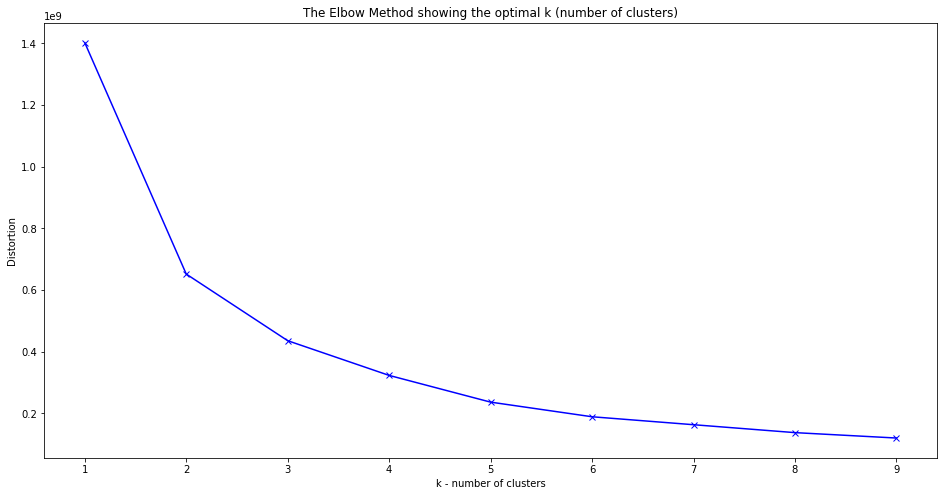

In [162]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (number of clusters)')
plt.show()

Based on the analysis of the elbow plot, the distorsion is minimized already by a clustering in 3 groups. However, in order to allow some variety of roles, and having the preliminary knowledge that there are at least 5 roles in the game, we will use a clustering of 6 groups so that it will allow us to combine later on different roles in our team pick analyses.

The explanation for this can be understood with a reference to a sport team (like a football team). There might be 3 positions in the game (attacker, defenders or midfielders), but within each of those positions, a player can play in the center or in the bands. If we made 11 clusters for football players it would be excesive and would not consider positions that are in between two groups (e.g. a defender that plays a lot in the midcamp). Thefore, if we picked some number of clusters betwwen 3 and 11, it would allow some hybrid positions, without overfitting the positions.

In line with this idea, we will select 6 clusters, to allow the support/core positions to exist, and some further division within those positions, but not making too many so that it becomes too specific to be practical.

Define the number of clusters and fit the data to the kmeans

In [163]:
n_clusters = 6
heroes_kmeans = KMeans(n_clusters=n_clusters,random_state=1000).fit(heroes_clustering)
heroes_clustering['kmeans'] = heroes_kmeans.labels_

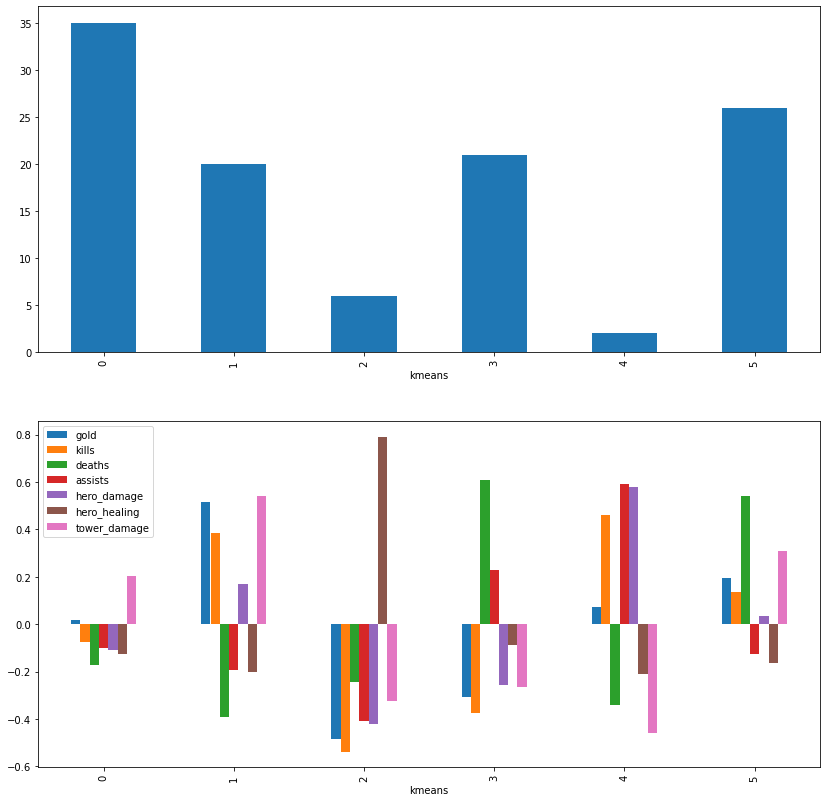

In [164]:
# generate group by metrics
kmeans_stats = heroes_clustering.groupby(['kmeans']).mean()
kmeans_stats['count'] = heroes_clustering.groupby(['kmeans'])['gold'].count()

# normalize metrics
kmeans_statmeans = kmeans_stats.mean(axis=0)
kmeans_range = kmeans_stats.max(axis=0) - kmeans_stats.min(axis=0)
kmeans_statnorm = (kmeans_stats - kmeans_statmeans) / kmeans_range
kmeans_statnorm = kmeans_statnorm

# plot the metrics
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))
kmeans_stats['count'].plot.bar(ax=axis1)
kmeans_statnorm.iloc[:,:7].plot.bar(ax=axis2).legend(loc='upper left')

Based on our understanding of functions in the game, we can interpret this as following:

* **Core Roles** - Higher gold
  * Killers
      * Nº 4 Good at killing, bad at pushing, tank.
  * Pushers
      * Nº 0 Good at pushing, bad at killing, balanced.
  * Killers and Pushers - Resistant
      * Nº 1 Good at killing, good at pushing, tank.
  * Killers and Pushers - Weak
      * Nº 5 Good at killing, good at pushing, squishy.  
* **Support Roles** - Lower gold
  * Healer
      * Nº 2 Good at healing, tank.
  * Kills abilitator
      * Nº 3 Good at assisting kills, squishy.

We will create a column in the heroes clustering, inlcuding the information of the hero as **hero_function**:

In [165]:
heroes_clustering['hero_function'] = 'na'
heroes_clustering.loc[(heroes_clustering['kmeans']==4),'hero_function'] = 'Core Killer / Tank'
heroes_clustering.loc[(heroes_clustering['kmeans']==0),'hero_function'] = 'Core Pusher / Balanced'
heroes_clustering.loc[(heroes_clustering['kmeans']==1),'hero_function'] = 'Core Killer / Pusher/ Tank'
heroes_clustering.loc[(heroes_clustering['kmeans']==5),'hero_function'] = 'Core Killer / Pusher / Squishy'
heroes_clustering.loc[(heroes_clustering['kmeans']==2),'hero_function'] = 'Support healer / Tank'
heroes_clustering.loc[(heroes_clustering['kmeans']==3),'hero_function'] = 'Support killer / Squishy'

#### 3.4.5.2 Clustering by Farm Dependency

Our second clustering of heroes aim to understand the farm dependency of the hero, this is, if they need a lot of farm to become impactful or little farm to become impactful. The more farm a hero needs, the later powerspike they must have and viceversa.

Regarless of the above, again, the net amount of gold would determine in any case how core or support any given hero is. This is important to include not to misinterpret the data.

In the following lines, we will perform a k-means on the heroes based on the metrics defined, as a result, we will categorize heroes by farm dependency:

In [166]:
#prepare the metrics
hero_info2 = players[['localized_name','gold','perghero', 'pergcreeps','pergroshan', 'pergtowers', 'pergother','last_hits']]
#sort the heroes by name
hero_info2 = hero_info2.sort_values(by='localized_name')
#group the heroes by mean()
hero_info2 = hero_info2.groupby(['localized_name']).mean()

Select the clustering metrics by sources of gold:

In [167]:
heroes_clustering2 = hero_info2[['gold', 'perghero', 'pergcreeps', 'pergroshan',
       'pergtowers', 'pergother','last_hits']]

Define the nº of optimal clusters, elbow method:

In [168]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(heroes_clustering2)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions:

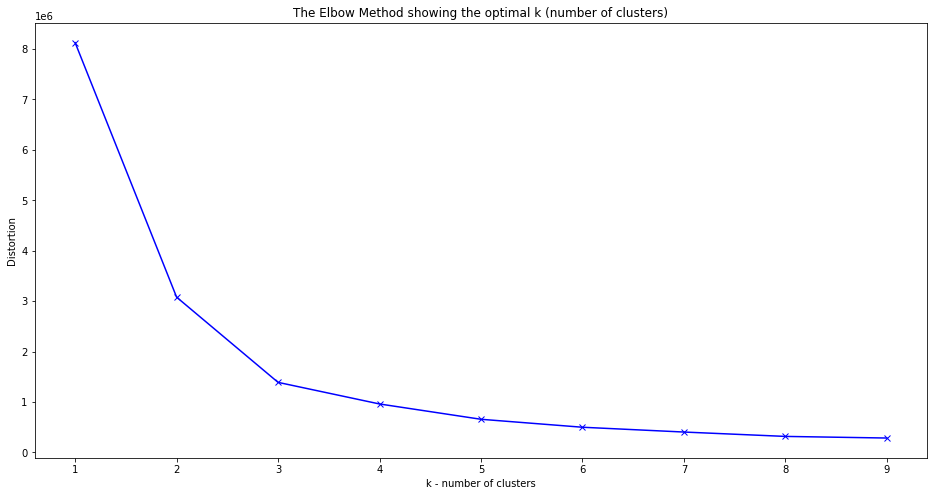

In [169]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (number of clusters)')
plt.show()

Based on farm dependancy, it seems that 3 clusters already minimize the distorsion. Therefore, we will proceed to group them into 3 groups. For example, we could group them into high farm dependant, moderate farm dependant and low farm dependant. It makes a lot of sense to cluster them in 3 groups based on these groups.

Define the number of clusters and fit the data to the kmeans

In [170]:
n_clusters = 3
heroes_kmeans2 = KMeans(n_clusters=n_clusters,random_state=1000).fit(heroes_clustering2)
heroes_clustering2['kmeans'] = heroes_kmeans2.labels_

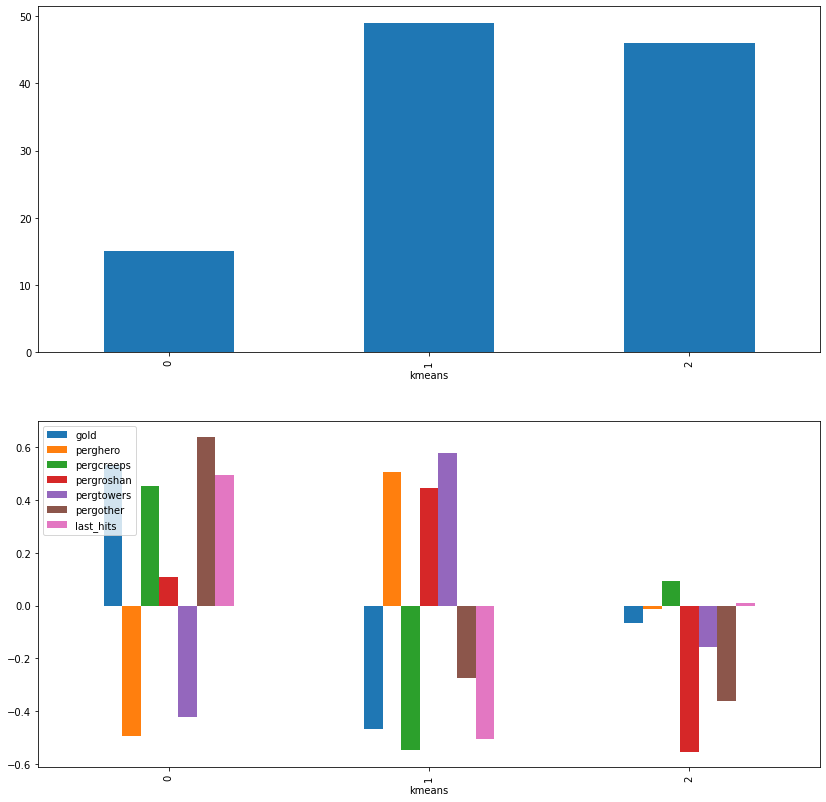

In [171]:
# generate group by metrics
kmeans_stats2 = heroes_clustering2.groupby(['kmeans']).mean()
kmeans_stats2['count'] = heroes_clustering2.groupby(['kmeans'])['gold'].count()

# normalize the metrics
kmeans_statmeans2 = kmeans_stats2.mean(axis=0)
kmeans_range2 = kmeans_stats2.max(axis=0) - kmeans_stats2.min(axis=0)
kmeans_statnorm2 = (kmeans_stats2 - kmeans_statmeans2) / kmeans_range2
kmeans_statnorm2 = kmeans_statnorm2

# Plot the results
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))
kmeans_stats2['count'].plot.bar(ax=axis1)
kmeans_statnorm2.iloc[:,:7].plot.bar(ax=axis2).legend(loc='upper left')

Based on our understanding of the sources of gold, we can cluster the heroes as:

* **Heroes that farm a lot**
  * Nº 0 - High Gold and High Last hits
* **Heroes that farm moderately**
  * Nº 2 - Moderate Gold and Moderate Last hits.
* **Heroes that farm very little**
  * Nº 1 - Low Gold and Low last hits
 
We will create a column in the heroes clustering, inlcuding the information of the hero as **hero_farm**:

In [172]:
heroes_clustering2['hero_farm'] = 'na'
heroes_clustering2.loc[(heroes_clustering2['kmeans']==0),'hero_farm'] = 'High Farm'
heroes_clustering2.loc[(heroes_clustering2['kmeans']==2),'hero_farm'] = 'Moderate Farm'
heroes_clustering2.loc[(heroes_clustering2['kmeans']==1),'hero_farm'] = 'Low Farm'

#### 3.4.5.3 Clustering by powerspike

On our third clustering of heroes, we will focus on the amount of gold, levels achieved, nº of kills and assists performed by the heroes. This will be a good indicator of when do heroes become more impactful in the game. For example, heroes with higher nº of kills and assists, but lower levels, indicate that they have an earlier powerspike, and heroes that have a higher level but lower kills and assists, indicate that they have a later powerspike.

Again, like always, the net amount of gold will be useful to preliminary understand if the hero is more core or more support.

Based on this clustering, we expect to categorize heroes based on their powerspike:

In [173]:
#prepare the metrics
hero_info3 = players[['localized_name','gold','level', 'kills','assists']]
#sort the heroes by name
hero_info3 = hero_info3.sort_values(by='localized_name')
#group the heroes by mean()
hero_info3 = hero_info3.groupby(['localized_name']).mean()

Select the heroes clustering metrics by powerspike:

In [174]:
heroes_clustering3 = hero_info3[['gold','level', 'kills','assists']]

Define the nº of optimal clusters, elbow method:

In [175]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(heroes_clustering3)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions:

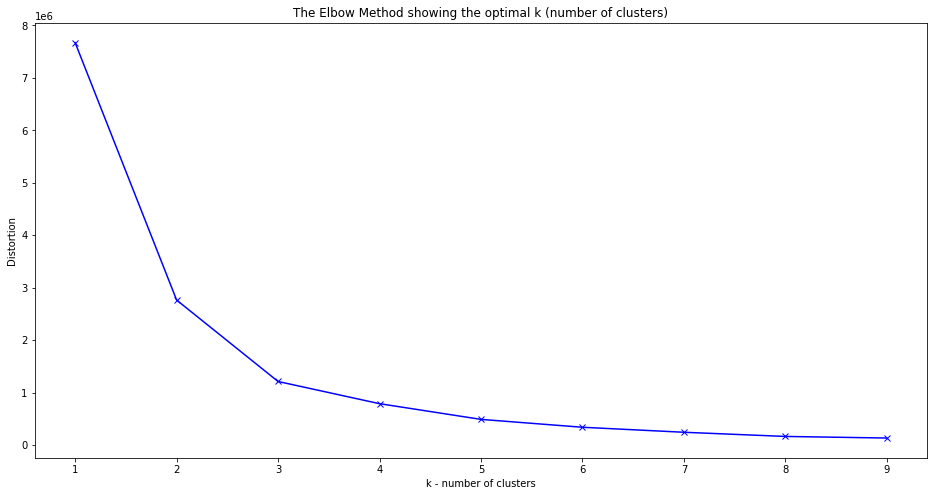

In [176]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (number of clusters)')
plt.show()

As 3 groups already seem to be minimize the distortion, we will proceed to group them into 3 groups. It makes sense to group them into 3 groups as early game heroes, mid game heroes and late game heroes. In fact, this is exactly what we would expect to find in terms of powerspike.

Define the number of clusters and fit the data to the kmeans

In [177]:
n_clusters = 3
heroes_kmeans3 = KMeans(n_clusters=n_clusters,random_state=1000).fit(heroes_clustering3)
heroes_clustering3['kmeans'] = heroes_kmeans3.labels_

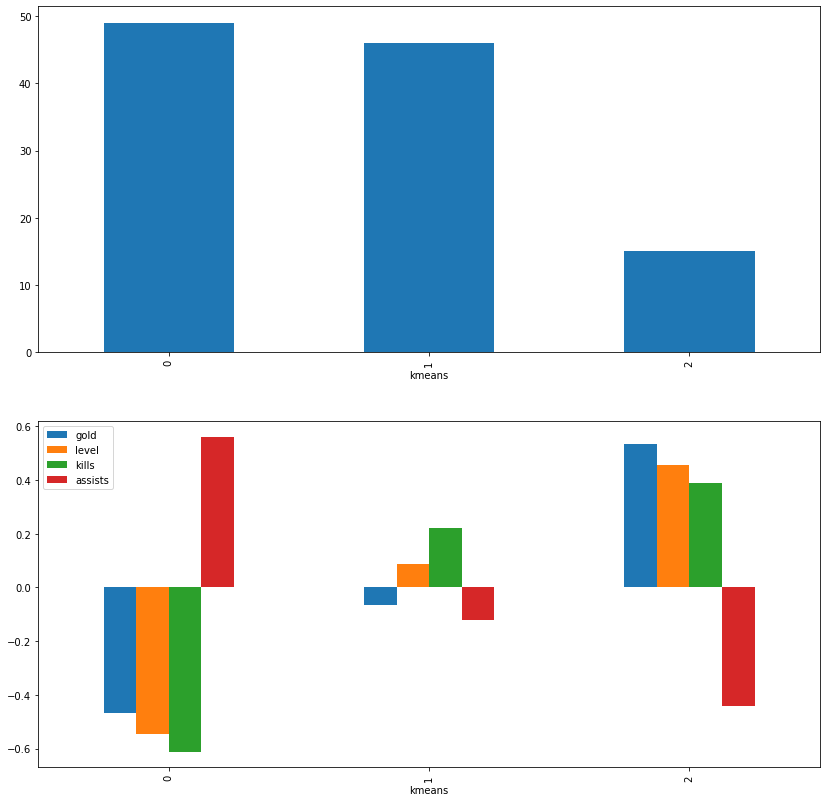

In [178]:
# generate group by metrics
kmeans_stats3 = heroes_clustering3.groupby(['kmeans']).mean()
kmeans_stats3['count'] = heroes_clustering3.groupby(['kmeans'])['level'].count()

# normalize the metrics
kmeans_statmeans3 = kmeans_stats3.mean(axis=0)
kmeans_range3 = kmeans_stats3.max(axis=0) - kmeans_stats3.min(axis=0)
kmeans_statnorm3 = (kmeans_stats3 - kmeans_statmeans3) / kmeans_range3
kmeans_statnorm3 = kmeans_statnorm3

# Plot the results
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))
kmeans_stats3['count'].plot.bar(ax=axis1)
kmeans_statnorm3.iloc[:,:4].plot.bar(ax=axis2).legend(loc='upper left')

Based on our understanding of the positions in the game, and clustering by the amount of gold, levels, and impact in the game (kills + assists), we could classify heroes as follows:

* **LATE GAME HEROES - impact with high levels**
  * Nº 2 - high level, high gold, high kills - Late game hero.
* **MID GAME HEROES - impact with moderate levels** - 
  * Nº 1 - Avg level, Avg gold, high kills, avg assists - Mid game hero 
* **EARLY GAME HEROES - impact with low levels**
  * Nº 0 - low level, low gold, low kills, high assists - Early game hero.

We will create a column in the heroes clustering, inlcuding the information of the hero as **hero_powerspike**:

In [179]:
heroes_clustering3['hero_powerspike'] = 'na'
heroes_clustering3.loc[(heroes_clustering3['kmeans']==2),'hero_powerspike'] = 'Late game'
heroes_clustering3.loc[(heroes_clustering3['kmeans']==1),'hero_powerspike'] = 'Mid game'
heroes_clustering3.loc[(heroes_clustering3['kmeans']==0),'hero_powerspike'] = 'Early game'

We merge the different clusterings into one dataframe to visualize the clustering classes, on "hero_classes"

This will allow us to have the 3 different categories together, and add them to our players dataframe. After doing this, we will be able to visualize the performance of heroes of each category based on:

* **Their function**
* **Their farm dependancy**
* **Their powerspike**

In [180]:
heroes_clustering.reset_index(inplace=True)
heroes_clustering2.reset_index(inplace=True)
heroes_clustering3.reset_index(inplace=True)

In [181]:
d1 = pd.DataFrame(heroes_clustering[['localized_name','hero_function']]).set_index('localized_name')
d2 = pd.DataFrame(heroes_clustering2[['localized_name','hero_farm']]).set_index('localized_name')
d3 = pd.DataFrame(heroes_clustering3[['localized_name','hero_powerspike']]).set_index('localized_name')
#we merge them
heroclass = d1.merge(d2,on='localized_name').merge(d3,on='localized_name')

In [182]:
heroclass.reset_index(inplace=True)

In [183]:
heroclass.head()

,localized_name,hero_function,hero_farm,hero_powerspike
0,Abaddon,Support killer / Squishy,Moderate Farm,Mid game
1,Alchemist,Core Killer / Pusher/ Tank,High Farm,Late game
2,Ancient Apparition,Support killer / Squishy,Low Farm,Early game
3,Anti-Mage,Core Pusher / Balanced,High Farm,Late game
4,Axe,Core Pusher / Balanced,Low Farm,Early game


In [184]:
#we add the classes to the players dataframe
playersclass = players.merge(heroclass,on='localized_name',how='left')

In [185]:
playersclass.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,pergother,perxphero,perxpcreeps,perxproshan,perxpother,perdmghero,perdmgstructure,hero_function,hero_farm,hero_powerspike
0,0,0,86,0,3261,10960,347,362,9,3,...,0.51,61.55,37.88,0.00,0.58,98.38,1.62,Support killer / Squishy,Low Farm,Early game
1,9,0,86,3,497,8980,232,281,4,14,...,0.00,51.52,48.42,0.00,0.06,97.21,2.79,Support killer / Squishy,Low Farm,Early game
2,16,0,86,1,610,16285,353,477,2,4,...,5.62,40.82,53.66,0.00,5.52,98.19,1.81,Support killer / Squishy,Low Farm,Early game
3,28,159,86,0,1826,10040,331,353,4,7,...,1.67,52.19,43.21,2.75,1.84,95.31,4.69,Support killer / Squishy,Low Farm,Early game
4,37,0,86,2,2151,20355,431,615,14,7,...,0.28,76.05,23.78,0.00,0.18,97.79,2.21,Support killer / Squishy,Low Farm,Early game


In [186]:
playersclass.shape

(499963, 62)

In [187]:
meanplayerclass = playersclass.groupby('localized_name').mean()

In [188]:
meanplayerclass.reset_index(inplace=True)

In [189]:
meanplayerclass = meanplayerclass.merge(heroclass, on='localized_name', how='left')

In [190]:
meanplayerclass.columns

Index(['localized_name', 'match_id', 'account_id', 'hero_id', 'player_slot',
       'gold', 'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'hero_damage', 'hero_healing',
       'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3', 'item_4',
       'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep', 'xp_roshan',
       'xp_other', 'gold_other', 'gold_death', 'gold_buyback', 'gold_sell',
       'gold_destroying_structure', 'gold_killing_heros',
       'gold_killing_creeps', 'gold_killing_roshan', 'start_time', 'duration',
       'tower_status_radiant', 'tower_status_dire', 'barracks_status_dire',
       'barracks_status_radiant', 'first_blood_time', 'game_mode',
       'radiant_win', 'perghero', 'pergcreeps', 'pergroshan', 'pergtowers',
       'pergother', 'perxphero', 'perxpcreeps', 'perxproshan', 'perxpother',
       'perdmghero', 'perdmgstructure', 'hero_function', 'hero_farm',
       'hero_powerspike'],
      dtype='ob

In [191]:
meanplayerclass.head()

,localized_name,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,...,pergother,perxphero,perxpcreeps,perxproshan,perxpother,perdmghero,perdmgstructure,hero_function,hero_farm,hero_powerspike
0,Abaddon,25494.746828,38657.028399,102.0,64.803323,1856.153474,11999.880665,363.055287,417.260725,5.005740,...,1.498975,46.968588,49.909547,1.454952,1.666877,91.508598,8.491402,Support killer / Squishy,Moderate Farm,Mid game
1,Alchemist,25367.509417,38349.547185,73.0,65.303675,2769.521633,24595.311005,709.545455,577.001832,6.679019,...,31.359372,32.013652,64.638463,0.753933,2.594012,87.156128,12.843872,Core Killer / Pusher/ Tank,High Farm,Late game
2,Ancient Apparition,25796.125278,44935.407375,68.0,65.951577,1662.564934,10969.666074,313.147046,324.378054,4.826151,...,1.834331,47.420416,49.633563,1.128894,1.817146,96.749340,3.250660,Support killer / Squishy,Low Farm,Early game
3,Anti-Mage,25174.778523,40329.663367,1.0,66.797467,2392.246275,19535.906769,554.192742,580.392827,7.340996,...,1.122229,27.990794,69.830502,0.771586,1.407200,80.291497,19.708503,Core Pusher / Balanced,High Farm,Late game
4,Axe,27146.194958,38419.484677,2.0,66.265594,1682.507933,13129.112150,400.109107,442.938274,8.525321,...,1.303864,43.895041,53.758663,0.822563,1.523817,96.588967,3.411033,Core Pusher / Balanced,Low Farm,Early game


#### 3.4.5.4 Visualization of the categories

We will show the categorization of heroes based on each of the categories generated.

In particular, we will analyze the early, mid and late game scene in the matches available.

First we will use the mean values of players, to get an idea of how each hero sits in the environment of categories set. Because we want to study each hero at their powerspike, we will subset the games first in 3 groups based on the duration of the game, this is, games from 15 to 35 minutes, games from 35 to 45 minutes and games from 45 minutes or more.

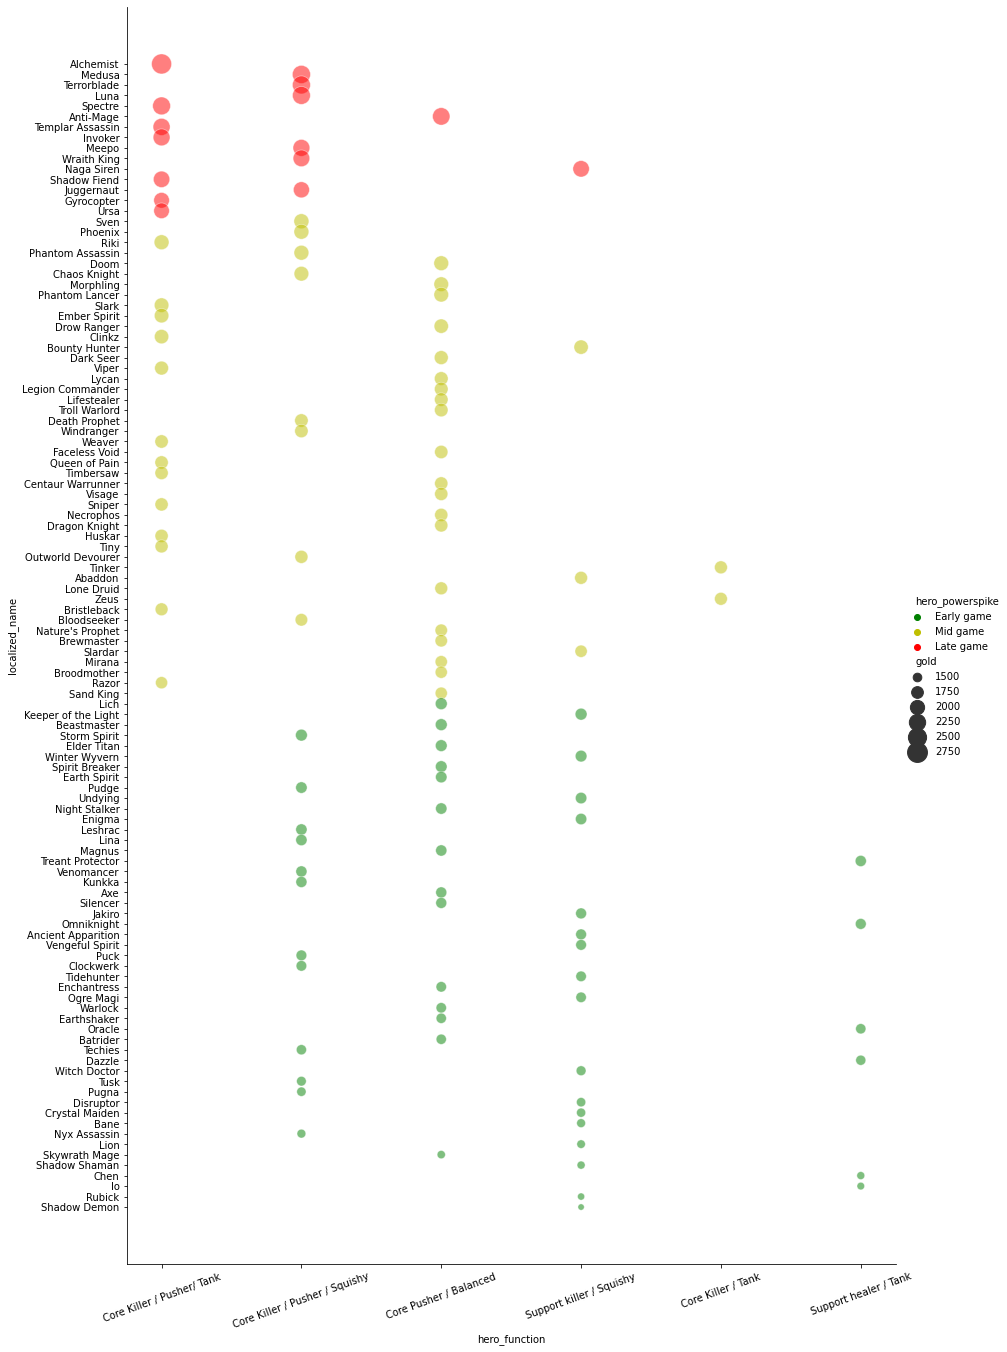

In [192]:
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g= sns.relplot(x='hero_function', y="localized_name",
            hue='hero_powerspike',
            hue_order=['Early game', 'Mid game', 'Late game'],
            alpha=.5, palette=palette,
            size='gold',
            sizes=(40,400),
            height=18, aspect=.7, data=meanplayerclass.sort_values(by='gold', ascending=False))
g.set_xticklabels(rotation=20)

From the image above we can reach some conclussions already.

At the **top of the graph**, in **red**, sit the late-game powerspike heroes, that earn more gold on average. These heroes perform mainly functions such as "Core Killers / Pushers / Squishy" and 'Core Killer / Pusher / Tank". 

At the **middle of the graph**, in **yellow**, sit the mid-game powerspike heroes. These heroes earn less gold than the late-game heroes, and perform more diversity of functions. This makes sense as normally these heroes are not so "specialized" into killing, and their mid-game powerspike allow them to perform well on different scenarios.

At the **bottom of the graph**, in **green**, sit the early-game powerspike heroes. These heroes earn the least amount of gold within the groups. In terms of function, they cluster more in the "Support type" roles.

#### 3.4.5.5 Preliminary Conclussions

Based on the graph above, we observe that most support heroes are early type heroes, and most Core killing heroes are late-game heroes. Also, there is a middle group of heroes in between, which seem to perform a wider spectrum of functions. This image is quite alligned with what we expected to see, in terms of hero time activation.

In particular, we would expect support heroes to have an earlier impact in the game and use their relative strength to push the enemy defensive structures or kill enemy heroes to gain an advantage for their team, as well as to give space to their late-game core heroes to develop. For example, if a support hero is pushing the enemy towers, the enemy team is likely to react and defend them; while doing so, the core heroes can more safely farm creeps as the enemy core heroes are busy defending, which slows their own development, as they can't farm at the same speed.

In a practical scenario, when doing a draft, if we visualized the enemy team's heroes and our team heroes, we could preliminary undestand the type of impact that we can make and/or that the enemy team will make, based on the function of heroes and their powerspike.

### 3.5 Split the data by winners and losers

We will split the data between winners and losers to visualize if early-game and mid-game heroes do really have better winning chances in shorter games. To do so, first we will subset 500 games and visualize their heroes composition, the duration of the game, and what team won.

In [193]:
playersclass['team'] = np.where(playersclass['player_slot'].between(0,6, inclusive=True), "team radiant","team dire")

In [194]:
playersclass[['team','player_slot']].value_counts()

team          player_slot
team dire     129            49999
team radiant  1              49998
team dire     128            49998
              132            49997
team radiant  0              49996
team dire     130            49996
team radiant  3              49995
              2              49995
team dire     131            49995
team radiant  4              49994
dtype: int64

In [195]:
winners = playersclass[(playersclass['radiant_win'] == True) & (playersclass['team']=='team radiant')]
losers = playersclass[(playersclass['radiant_win'] == False) & (playersclass['team']=='team radiant')]

#### 3.5.1 Winners and losers based on gold earned

Below, we plot the amount of gold earned by winning and losing players:

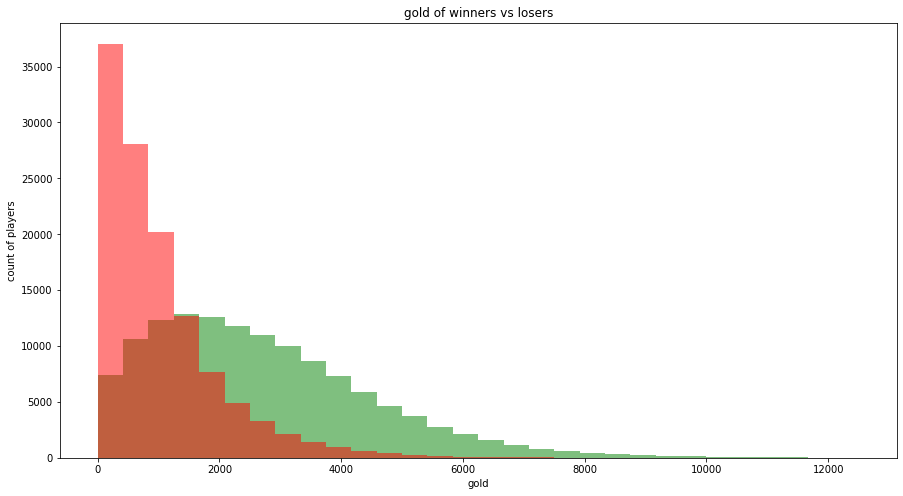

In [196]:
plt.figure(figsize=(15,8))

plt.hist(winners.gold, bins=30, range=(0,12500), color='g', alpha=0.5)
plt.title('gold of winners vs losers')
plt.xlabel('gold')
plt.ylabel('count of players')
plt.hist(losers.gold, bins=30, range=(0,12500), color='r', alpha=0.5)

plt.show()

As we can observe, the winning team tends to accrue more gold than the losing team. Based on our knowledge of the game this makes sense, as the winning team's advantage through killing enemies, farming more creeps or destroying more structures derives in a higher amount of gold earned.

#### 3.5.2 Winners and losers based on gold per minute

Below, we plot the amount of gold earned by winning and losing players:

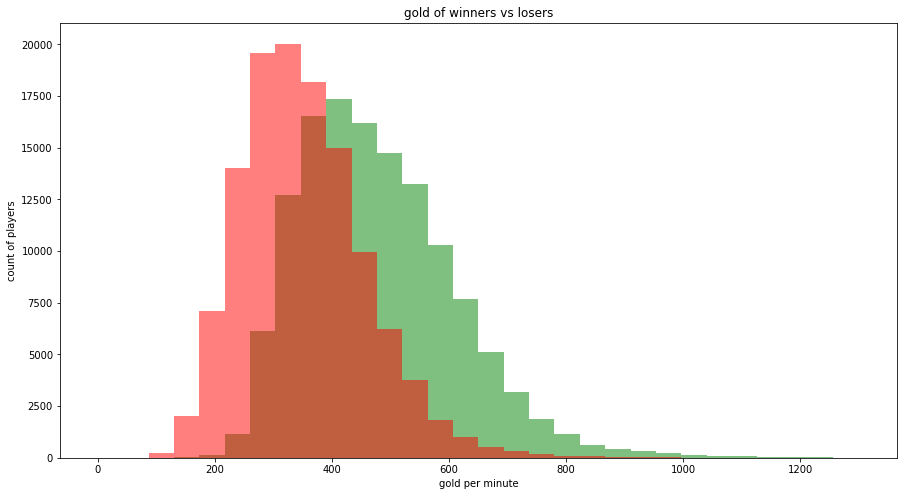

In [197]:
plt.figure(figsize=(15,8))

plt.hist(winners.gold_per_min, bins=30, range=(0,1300), color='g', alpha=0.5)
plt.title('gold of winners vs losers')
plt.xlabel('gold per minute')
plt.ylabel('count of players')
plt.hist(losers.gold_per_min, bins=30, range=(0,1300), color='r', alpha=0.5)

plt.show()

It is clear that winning teams have higher gold per minute earned than losing players.

#### 3.5.3 Winners and losers based on levels obtained

Below we plot the levels achieved by players in their games:

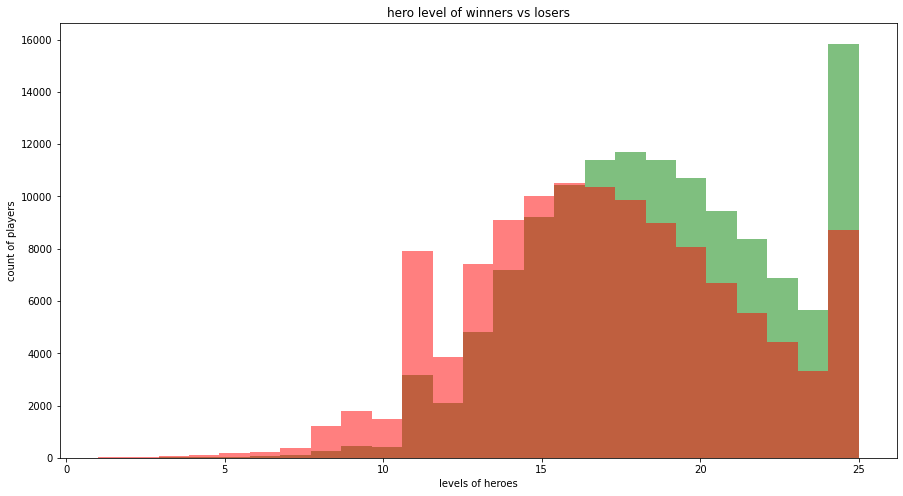

In [198]:
plt.figure(figsize=(15,8))

plt.hist(winners.level, bins=25, color='g', alpha=0.5)
plt.title('hero level of winners vs losers')
plt.xlabel('levels of heroes')
plt.ylabel('count of players')
plt.hist(losers.level, bins=25, color='r', alpha=0.5)

plt.show()

Also, the winning players tend to have an advantage at end game in terms of levels. This means that they have leveled up their heroes more than the loser's team players. The experience is accrued mainly through killing enemy heroes, farming creeps or destroying structures. Higher hero level is an advantage to the extent that the hero has unlocked more of their abilities, making it more powerful. Therefore, a team with higher levels has an advantage and has more chances of winning the match.

#### 3.5.4 Winners and losers based on gold given to enemy team

Below we plot the amount of gold given to enemy players by dying:

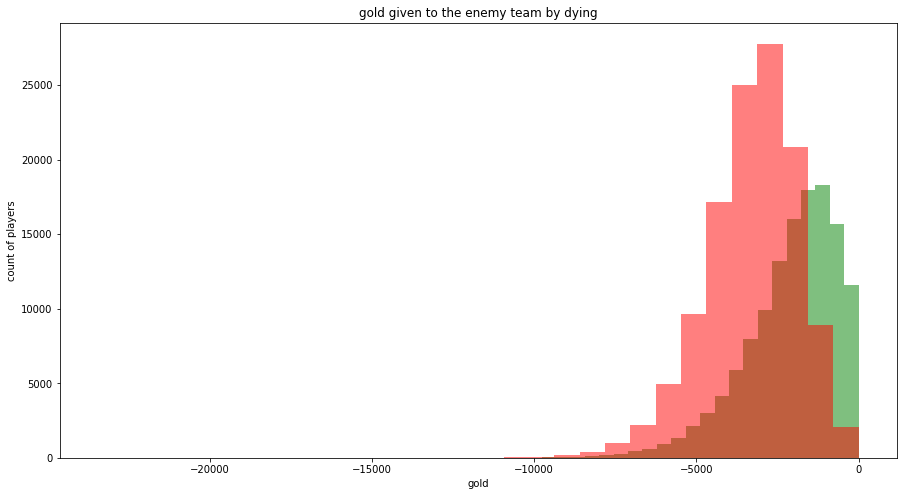

In [199]:
plt.figure(figsize=(15,8))

plt.hist(winners.gold_death, bins=30, color='g', alpha=0.5)
plt.title('gold given to the enemy team by dying')
plt.xlabel('gold')
plt.ylabel('count of players')
plt.hist(losers.gold_death, bins=30, color='r', alpha=0.5)

plt.show()

It can be observed that winning players give less gold to the enemy team by dying. When a player dies, they will give gold and experience to the player that killed them and assisted the kill (if any). Winning players die less, and therefore, they give less gold and experience to the enemy team.

#### 3.5.5 Winners and losers based on gold obtained from roshan

Below we plot the amount of gold obtained by players from killing the roshan:

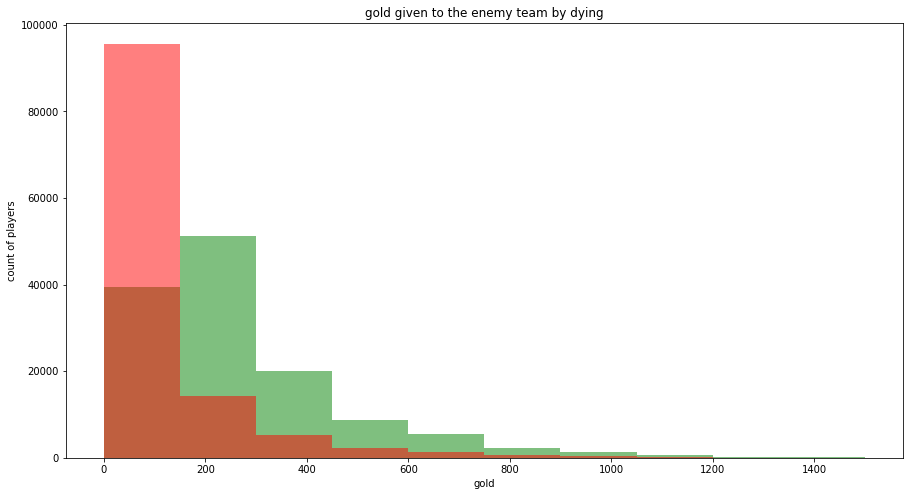

In [200]:
plt.figure(figsize=(15,8))

plt.hist(winners.gold_killing_roshan, bins=10, color='g', range=(0,1500), alpha=0.5)
plt.title('gold given to the enemy team by dying')
plt.xlabel('gold')
plt.ylabel('count of players')
plt.hist(losers.gold_killing_roshan, bins=10, color='r',range=(0,1500), alpha=0.5)

plt.show()

Winning teams get more gold from killing the roshan than losing teams. This is something that makes sense, as killing the roshan does not only give gold and experience, but drops a special item called "the aegis" which is basically a consumable object that will revive the hero when killed. In big lines, a hero with the Aegis, if killed, will revive after 5 seconds in the same spot that it died. In any teamfight having this item has a huge impact, so it makes sense that heroes that obtain this items more times end up winnning the game.

#### 3.5.6 Winners and losers based on damage dealt to heroes

Below we plot the amount of damage dealt to enemy heroes by players:

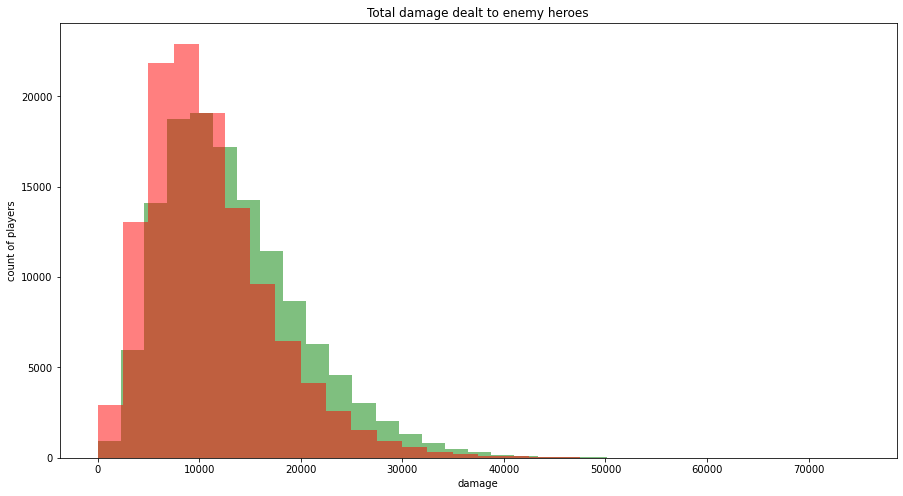

In [201]:
plt.figure(figsize=(15,8))

plt.hist(winners.hero_damage, bins=30, color='g', alpha=0.5)
plt.title('Total damage dealt to enemy heroes')
plt.xlabel('damage')
plt.ylabel('count of players')
plt.hist(losers.hero_damage, bins=30, color='r', alpha=0.5)

plt.show()

We can observe that winners tend to deal more damage to enemy heroes than losers. This makes sense to the extent that heroes with more gold will buy items that deal more damage, which will help them to kill enemy heroes easier. Therefore, it is reasonable that they do, on average, more damage to the enemy team's heroes than the other way around.

#### 3.5.7 Winners and losers based on damage dealt to structures

Below we plot the amount of damage dealt to structures by players:

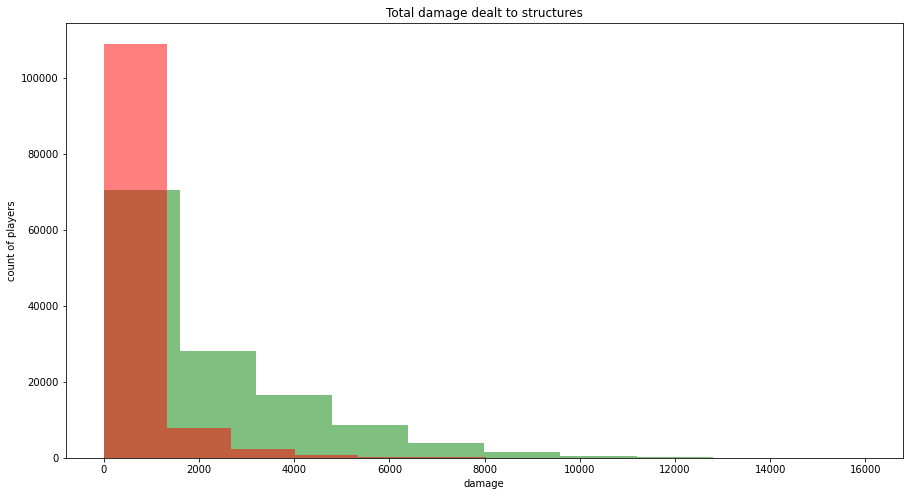

In [202]:
plt.figure(figsize=(15,8))

plt.hist(winners.tower_damage, bins=10, color='g',alpha=0.5)
plt.title('Total damage dealt to structures')
plt.xlabel('damage')
plt.ylabel('count of players')
plt.hist(losers.tower_damage, bins=10, color='r', alpha=0.5)

plt.show()

We observe that winners tend to deal more damage to enemy structures. This is logical, as the winning team, with an advantage in gold and experience, translated in better items and more levels, will find it easier to destroy enemy structures, dealing more strucuture damage than the losing team.

### 3.6 Winners and losers - under different game durations

We will further subset the winners and losers based on teh duration of the game to further test our ideas that early game heroes have more chances of winning in short games than late game heroes and viceversa.

In [203]:
playersclass['team'].value_counts()

team dire       249985
team radiant    249978
Name: team, dtype: int64

In [204]:
playersclass['result'] = np.where((playersclass['radiant_win'] == True) & (playersclass['team'] == 'team radiant'), "winner",np.where((playersclass['radiant_win'] == False) & (playersclass['team'] == 'team dire'),'winner','loser'))

In [205]:
playersclass['result'].value_counts()

winner    249994
loser     249969
Name: result, dtype: int64

#### 3.6.1 Winners and losers - under 35 minutes

We will plot the winners and losers players in the under 35 minute game duration, this is, in short games.

(0.0, 1300.0)

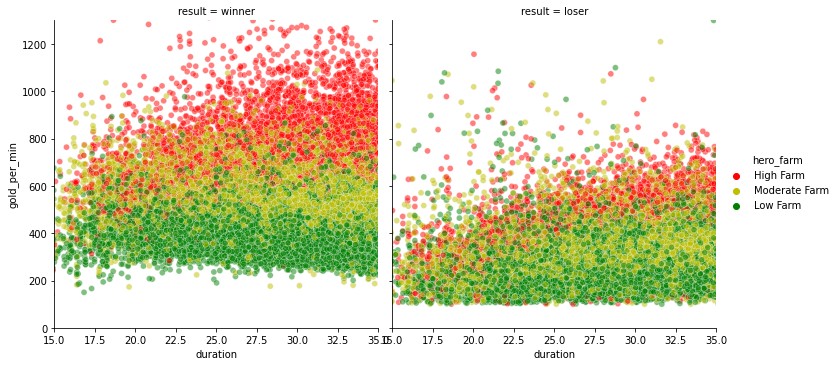

In [206]:
palette ={"Low Farm": "g", "Moderate Farm": "y", "High Farm": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_farm", hue_order= ['High Farm','Moderate Farm','Low Farm'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(15,35)
plt.ylim(0,1300)

(0.0, 1300.0)

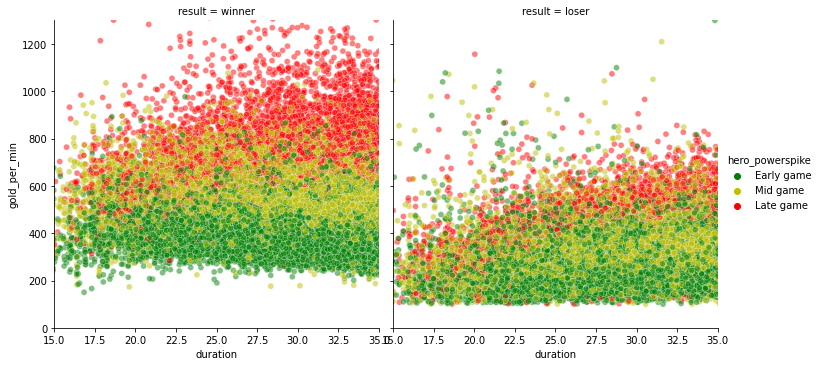

In [207]:
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_powerspike", hue_order= ['Early game','Mid game','Late game'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(15,35)
plt.ylim(0,1300)

We can observe that in short games there is a clear difference in terms of gold per minute between winners and losers. In particular, regarding the powerspike of heroes and this fact, it is remarkable that in the winners group, the early heroes, mid heroes and late heroes seem to be stratified, while in the losers team they are more mixed.

Also, it is relevant to highlight that in very short games, with durations under 20 minutes, late-game heroes tend to struggle a lot, as they populate some of the lowest gold per minute levels of the chart. However, in winning teams, there is a higher proportion of early-mid game heroes in games under 20 minutes, with higher gold per minute ratios.

In conclusion, it seems that winning teams have a more stratified gold per minute ratio for all their players, regardless of their powerspike. This could be a result of applying the right strategy at early game.

#### 3.6.2 Winners and losers - from 35 to 45 minutes

We will plot the winners and losers players in the 35-45 minute game duration, this is, in average games.

(0.0, 1300.0)

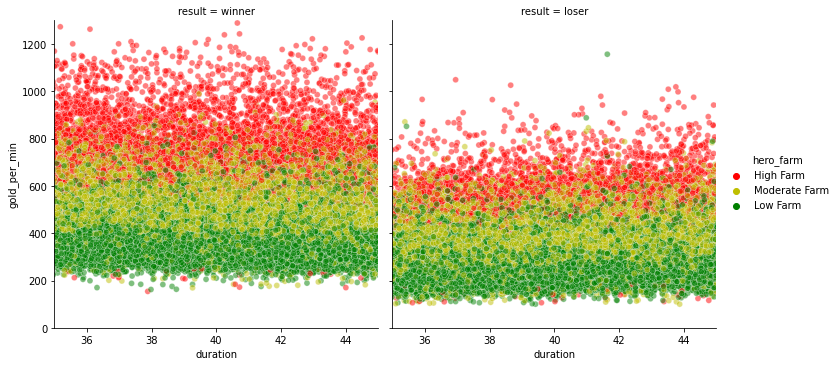

In [208]:
palette ={"Low Farm": "g", "Moderate Farm": "y", "High Farm": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_farm", hue_order= ['High Farm','Moderate Farm','Low Farm'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(35,45)
plt.ylim(0,1300)

(0.0, 1300.0)

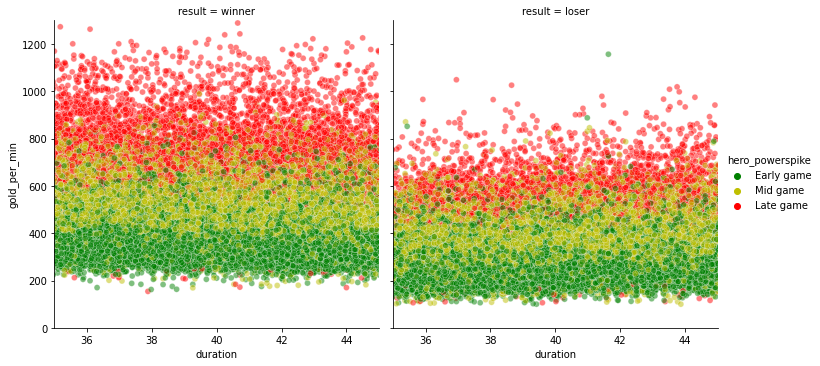

In [209]:
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_powerspike", hue_order= ['Early game','Mid game','Late game'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(35,45)
plt.ylim(0,1300)

In average duration games, we observe that the level of gold earned by players does not change so much through time. It is an indication that early-mid players have developed and late-game heroes are very close to their full dvelopment.

In relation with the differences between winning and losing players, it is notable that for losers, there is a bigger difference between the gold per minute of late game heroes and early game heroes. Also, on average, their mid game heroes earn less gold per minute. This could be an indicator that their team has not developed in a coordinated way, leaving the early-mid game heroes underleveled, while their core late-game heroes develop.

In relation with the winning players, again, they are more stratified, which can be an indicator that the early-mid game heroes and the late-game heroes have been able to complement through killing or destroying structures, to develop in paralel until this point of the game.

The biggest difference seems to remain in the early-mid game heroes. In average duration games, the team that has the highest gold per minute in their early-mid game heroes seems to have more chances of winning, as late-game heroes are very equal for both grouops in terms of gold earned per minute.

#### 3.6.3 Winners and losers - over 45 minutes

We will plot the winners and losers players in the over 45 minutes game duration, this is, in long games.

(0.0, 1300.0)

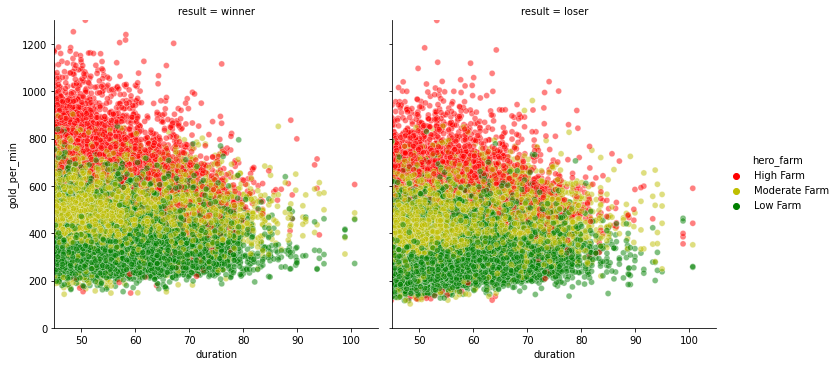

In [210]:
palette ={"Low Farm": "g", "Moderate Farm": "y", "High Farm": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_farm", hue_order= ['High Farm','Moderate Farm','Low Farm'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(45,105)
plt.ylim(0,1300)

(0.0, 1300.0)

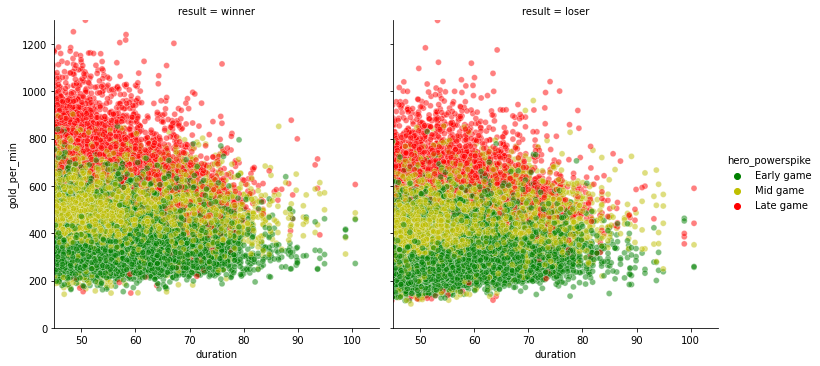

In [211]:
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.relplot(data=playersclass, x="duration", y='gold_per_min', hue="hero_powerspike", hue_order= ['Early game','Mid game','Late game'],
                col='result', col_order=['winner','loser'],palette=palette, alpha=0.5)
plt.xlim(45,105)
plt.ylim(0,1300)

As the game progresses, the gold per minute seems to fall. This is an indication that players do not kill enemies, destroy structures or farm creeps so much, and as a result the game seems to become more static.

At this stage of the game, it iseems that both groups are equally stratified, or at least very similarly. This would be an indication that in end games both teams end up converging in terms of gold per minute, which would make them very equal in terms of strength.

In any case, the winners group still seem to have a higher gold per minute ratio for both early-mid game heroes, and late-heroes of both groups seem to be similar, being the losers' group slightly more spread than the winners group late heroes.

#### 3.6.4 Winners and losers - proportions of players of each type

We will analyze the proportion of players of each powerspike in the winning and losing games.

In [212]:
proportions = playersclass.groupby(['result','typeofgame','hero_powerspike']).agg('count').reset_index()

In [213]:
np.sum(proportions[proportions['result']=='winner'].gold_per_min)

249994

In [214]:
np.sum(proportions[proportions['result']=='loser'].gold_per_min)

249969

#### 3.6.4.1 Winners and losers - in short games - by hero_powerspike

We will plot the proportion of players in winning and losing games based on their heroes powerspike, this is, the moment of the game where they have the highest impact.

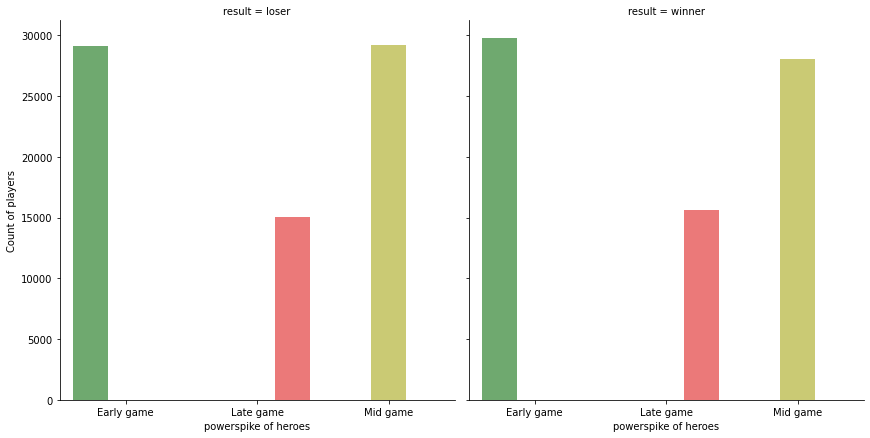

In [215]:
# Draw a nested barplot by species and sex
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.catplot(
    data=proportions[proportions['typeofgame']=='short game'], kind="bar",
    x="hero_powerspike", y="hero_farm", hue="hero_powerspike", hue_order=['Early game','Mid game','Late game'],
    palette=palette, alpha=.6, height=6, col='result'
)
g.set_axis_labels("powerspike of heroes", "Count of players")

We observe that in shorter games, combinations of early game and late game heroes have better winning chances. This could be due to the fact that early heroes make space for mid-late game heroes, and they use this to develop themselves quicker than the enemy team mid-game heroes.

#### 3.6.4.2 Winners and losers - in average games - by hero_powerspike

We will plot the proportion of players in winning and losing games based on their heroes powerspike, this is, the moment of the game where they have the highest impact.

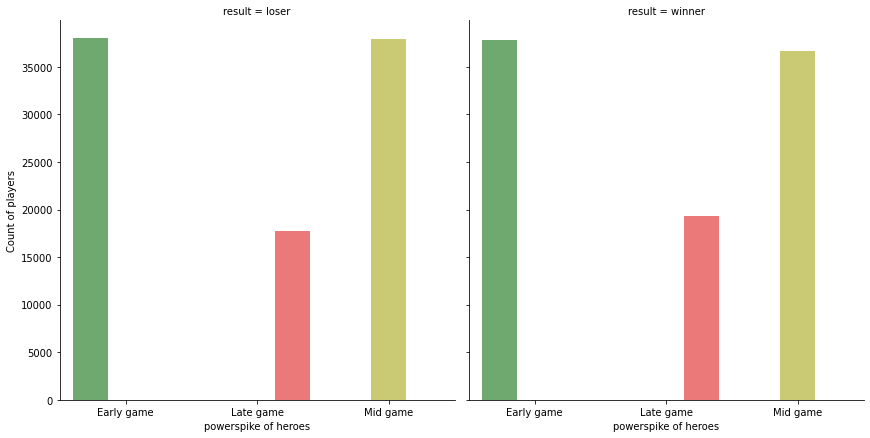

In [216]:
# Draw a nested barplot by species and sex
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.catplot(
    data=proportions[proportions['typeofgame']=='average game'], kind="bar",
    x="hero_powerspike", y="hero_farm", hue="hero_powerspike", hue_order=['Early game','Mid game','Late game'],
    palette=palette, alpha=.6, height=6, col='result'
)
g.set_axis_labels("powerspike of heroes", "Count of players")

We observe that, in average duration games, still higher leverage on early-late game heroes is more succesfull. This could be explained by the fact that even at mid game, the initial advantage achieved by early heroes is enough to mid-late heroes to develop faster than the enemy team. Also, the fact that there are less proportion of mid heroes allows the resources to be less distributed between mid-late heroes, which would be an argument to state that it is more efficient to minimize the amount of mid game heroes in the draft.

#### 3.6.4.3 Winners and losers - in long games - by hero_powerspike

We will plot the proportion of players in winning and losing games based on their heroes powerspike, this is, the moment of the game where they have the highest impact.

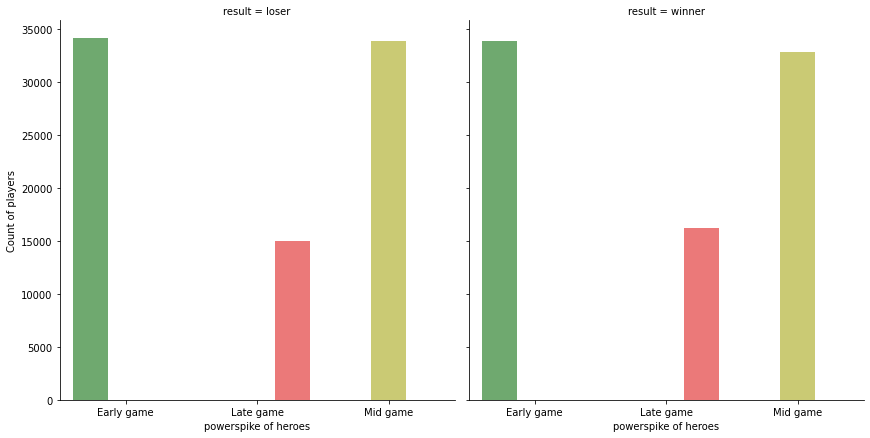

In [217]:
# Draw a nested barplot by species and sex
palette ={"Early game": "g", "Mid game": "y", "Late game": "r"}
g = sns.catplot(
    data=proportions[proportions['typeofgame']=='long game'], kind="bar",
    x="hero_powerspike", y="hero_farm", hue="hero_powerspike", hue_order=['Early game','Mid game','Late game'],
    palette=palette, alpha=.6, height=6, col='result'
)
g.set_axis_labels("powerspike of heroes", "Count of players")

We observe, in long games that it is still slightly better to split the draft between early-late heroes in detriment of mid game heroes. An argument for this could be that, in late games, that higher percentage of late-game heroes is fundamental in victory, regardless of the actions of the early-mid heroes.

In terms of map resources, this could be explained by the fact that, having less mid-game heroes, both the mid-late heroes have a greater distribution of resources, which make the level up and buy better items.

Regardless of the explanation, it seems that having more late-game heroes is an advantage in long games.

### 3.7 The evolution of gold per minute per hero

At this point we have reached already the conclussion that winning players have a higher gold per minute ratio than losing players, and that this is the main observable factor that determines victory. For any given game duration, the team with higher gold per minute ratio seems to win.

We also made clusters of heroes by their powerspike, farm dependancy and function in the game.

At this point, we would like to understand, on a team basis, how does that gold per minute evolve.

This will allow us to understand when are the points of the game where each hero has a greater spike of gold per minute, this is, when is their gold per minute higher. If we can understand this, it will be useful to predict what the estimated combined gold per minute be for a given team.

In [218]:
players_time.head()

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,...,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,...,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,...,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,...,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,...,1048,1500,26,1842,400,0,210,1431,9,589


In [219]:
#we create and group the information based on ranges of 5 mins instead of minute by minute.
players_time['min'] = np.where(players_time['times'] == 0, 0, players_time['times'] /60)
list_of_mins = list(range(0,266))
#[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,260,265]
players_time = players_time[players_time['min'].isin(list_of_mins)]
players_time = players_time.set_index('match_id').reset_index()
players_time.columns

Index(['match_id', 'times', 'gold_t_0', 'lh_t_0', 'xp_t_0', 'gold_t_1',
       'lh_t_1', 'xp_t_1', 'gold_t_2', 'lh_t_2', 'xp_t_2', 'gold_t_3',
       'lh_t_3', 'xp_t_3', 'gold_t_4', 'lh_t_4', 'xp_t_4', 'gold_t_128',
       'lh_t_128', 'xp_t_128', 'gold_t_129', 'lh_t_129', 'xp_t_129',
       'gold_t_130', 'lh_t_130', 'xp_t_130', 'gold_t_131', 'lh_t_131',
       'xp_t_131', 'gold_t_132', 'lh_t_132', 'xp_t_132', 'min'],
      dtype='object')

In [220]:
#calculate the average gold and average gpm of each team based on sum of each player, at 1 mins timestamps
players_time['gold_radiant'] = np.where((players_time.gold_t_0+players_time.gold_t_1+players_time.gold_t_2+players_time.gold_t_3+players_time.gold_t_4) == 0, 0,
    (players_time.gold_t_0+players_time.gold_t_1+players_time.gold_t_2+players_time.gold_t_3+players_time.gold_t_4)/5)
players_time['gold_dire'] = np.where((players_time.gold_t_128+players_time.gold_t_129+players_time.gold_t_130+players_time.gold_t_131+players_time.gold_t_132) == 0, 0,
    (players_time.gold_t_128+players_time.gold_t_129+players_time.gold_t_130+players_time.gold_t_131+players_time.gold_t_132)/5)
players_time['gpm_radiant'] = players_time['gold_radiant'] / players_time['min']
players_time['gpm_dire'] = players_time['gold_dire'] / players_time['min']
#calculate the average xp and average xpm of each team based on sum of each player, at 1 mins timestamps
players_time['xp_radiant'] = np.where((players_time.xp_t_0+players_time.xp_t_1+players_time.xp_t_2+players_time.xp_t_3+players_time.xp_t_4) == 0, 0,
    (players_time.xp_t_0+players_time.xp_t_1+players_time.xp_t_2+players_time.xp_t_3+players_time.xp_t_4)/5)
players_time['xp_dire'] = np.where((players_time.xp_t_128+players_time.xp_t_129+players_time.xp_t_130+players_time.xp_t_131+players_time.xp_t_132) == 0, 0,
    (players_time.xp_t_128+players_time.xp_t_129+players_time.xp_t_130+players_time.xp_t_131+players_time.xp_t_132)/5)
players_time['xpm_radiant'] = players_time['xp_radiant'] / players_time['min']
players_time['xpm_dire'] = players_time['xp_dire'] / players_time['min']

In [221]:
players_time.xp_radiant.head(20)

0        0.0
1      138.4
2      475.2
3      726.8
4     1057.0
5     1296.8
6     1561.4
7     1812.0
8     2327.8
9     2581.4
10    2873.2
11    3251.8
12    3534.8
13    4009.0
14    4231.4
15    4805.0
16    5793.6
17    5966.0
18    6437.0
19    6740.4
Name: xp_radiant, dtype: float64

In [222]:
#make a pivot table with the heroes in columns
hero_order = players.sort_values(by=['match_id','player_slot'], ascending=True)
hero_order = hero_order[['match_id','player_slot','localized_name']]
hero_order = hero_order.pivot('match_id', columns='player_slot', values='localized_name')
hero_order.head(40)

player_slot,0,1,2,3,4,128,129,130,131,132
match_id,,,,,,,,,,
0,Rubick,Clockwerk,Treant Protector,Shadow Fiend,Spectre,Ember Spirit,Abaddon,Templar Assassin,Earthshaker,Alchemist
1,Earthshaker,Meepo,Spirit Breaker,Queen of Pain,Windranger,Alchemist,Zeus,Crystal Maiden,Spectre,Ember Spirit
2,Clockwerk,Terrorblade,Mirana,Faceless Void,Shadow Shaman,Beastmaster,Earthshaker,Morphling,Phantom Lancer,Undying
3,Dazzle,Phantom Assassin,Riki,Lion,Queen of Pain,Brewmaster,Tiny,Lich,Venomancer,Viper
4,Juggernaut,Queen of Pain,Dark Seer,Disruptor,Doom,Skywrath Mage,Tusk,Zeus,Spectre,Windranger
5,Riki,Shadow Shaman,Spectre,Ember Spirit,Spirit Breaker,Slardar,Earth Spirit,Bounty Hunter,Ogre Magi,Shadow Fiend
6,Vengeful Spirit,Juggernaut,Spectre,Doom,Tusk,Witch Doctor,Faceless Void,Abaddon,Undying,Shadow Fiend
7,Nature's Prophet,Phantom Assassin,Centaur Warrunner,Pudge,Invoker,Slark,Witch Doctor,Sniper,Windranger,Lion
8,Phantom Assassin,Slardar,Undying,Zeus,Witch Doctor,Spirit Breaker,Slark,Templar Assassin,Sven,Queen of Pain


In [223]:
hero_order = pd.DataFrame(hero_order)

In [224]:
hero_order[0:2]

player_slot,0,1,2,3,4,128,129,130,131,132
match_id,,,,,,,,,,
0,Rubick,Clockwerk,Treant Protector,Shadow Fiend,Spectre,Ember Spirit,Abaddon,Templar Assassin,Earthshaker,Alchemist
1,Earthshaker,Meepo,Spirit Breaker,Queen of Pain,Windranger,Alchemist,Zeus,Crystal Maiden,Spectre,Ember Spirit


In [225]:
table_categories = meanplayerclass[['localized_name','hero_function','hero_powerspike','hero_farm']]
table_categories.head()

,localized_name,hero_function,hero_powerspike,hero_farm
0,Abaddon,Support killer / Squishy,Mid game,Moderate Farm
1,Alchemist,Core Killer / Pusher/ Tank,Late game,High Farm
2,Ancient Apparition,Support killer / Squishy,Early game,Low Farm
3,Anti-Mage,Core Pusher / Balanced,Late game,High Farm
4,Axe,Core Pusher / Balanced,Early game,Low Farm


In [226]:
players_time.T

,0,1,2,3,4,5,6,7,8,9,...,2209764,2209765,2209766,2209767,2209768,2209769,2209770,2209771,2209772,2209773
match_id,0.0,0.0,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000,0.000000,...,49999.000000,49999.000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
times,0.0,60.0,120.0,180.000000,240.00,300.00,360.000000,420.000000,480.000,540.000000,...,2340.000000,2400.000,2460.000000,2520.000000,2580.000000,2640.000000,2700.000000,2760.000000,2820.000000,2880.000000
gold_t_0,0.0,409.0,546.0,683.000000,956.00,1056.00,1156.000000,1257.000000,1809.000,2111.000000,...,15717.000000,15817.000,15938.000000,16541.000000,16641.000000,19098.000000,19460.000000,19948.000000,19997.000000,19997.000000
lh_t_0,0.0,0.0,0.0,1.000000,1.00,1.00,1.000000,2.000000,3.000,3.000000,...,181.000000,181.000,182.000000,192.000000,192.000000,215.000000,227.000000,237.000000,237.000000,237.000000
xp_t_0,0.0,63.0,283.0,314.000000,485.00,649.00,680.000000,778.000000,1135.000,1393.000000,...,17128.000000,17128.000,17192.000000,17601.000000,17607.000000,20444.000000,20659.000000,20889.000000,20889.000000,20889.000000
gold_t_1,0.0,142.0,622.0,927.000000,1264.00,1451.00,1744.000000,2053.000000,2536.000,3033.000000,...,16741.000000,17429.000,17906.000000,18006.000000,18161.000000,18261.000000,18478.000000,18889.000000,18938.000000,18938.000000
lh_t_1,0.0,1.0,4.0,9.000000,11.00,13.00,18.000000,23.000000,32.000,33.000000,...,115.000000,117.000,127.000000,127.000000,129.000000,129.000000,134.000000,148.000000,148.000000,148.000000
xp_t_1,0.0,186.0,645.0,1202.000000,1583.00,1810.00,2192.000000,2584.000000,3153.000,3449.000000,...,23807.000000,26797.000,27672.000000,27672.000000,27832.000000,27832.000000,28012.000000,28437.000000,28437.000000,28437.000000
gold_t_2,0.0,168.0,330.0,430.000000,530.00,630.00,730.000000,830.000000,1328.000,1510.000000,...,13783.000000,14518.000,14825.000000,15162.000000,17207.000000,18988.000000,19108.000000,19208.000000,19257.000000,19257.000000
lh_t_2,0.0,0.0,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000,1.000000,...,70.000000,73.000,82.000000,84.000000,87.000000,89.000000,90.000000,90.000000,90.000000,90.000000


In [227]:
df_multi = players_time.set_index(['match_id', 'times'])

In [228]:
df_multi.head(40)

gold_t_0  lh_t_0  xp_t_0  gold_t_1  lh_t_1  xp_t_1  gold_t_2  \
match_id times                                                                 
0        0             0       0       0         0       0       0         0   
         60          409       0      63       142       1     186       168   
         120         546       0     283       622       4     645       330   
         180         683       1     314       927       9    1202       430   
         240         956       1     485      1264      11    1583       530   
         300        1056       1     649      1451      13    1810       630   
         360        1156       1     680      1744      18    2192       730   
         420        1257       2     778      2053      23    2584       830   
         480        1809       3    1135      2536      32    3153      1328   
         540        2111       3    1393      3033      33    3449      1510   
         600        2211       3    1532      3379      39    3903      1650   
         660        2311       3    1782      3899      49    4383      1750   
         720        2411       3    1915      4151      54    4835      1917   
         780        2821       4    2381      4634      57    5391      2177   
         840        2921       4    2443      4902      61    5618      2277   
         900        3324       5    2914      5444      64    6117      2869   
         960        3624       5    3020      6729      69    9195      3457   
         1020       3724       5    3020      6829      69    9215      3557   
         1080       4147       9    3361      7173      69    9422      3905   
         1140       4247       9    3540      7364      71    9499      4439   
         1200       4849       9    4321      7541      71    9890      4757   
         1260       5019       9    4451      7842      71   10000      5149   
         1320       5418      13    5125      8423      71   10756      5634   
         1380       5599      15    5461      8693      75   10968      5829   
         1440       5699      15    5516      8872      77   11034      6119   
         1500       6294      15    5841      9228      77   11306      6486   
         1560       6394      15    5963      9558      79   12160      6954   
         1620       6812      19    6355      9986      82   12326      7324   
         1680       7564      20    7747     10242      82   12719      7862   
         1740       7664      20    7747     10825      82   14079      7962   
         1800       8124      20    7747     12590      83   17244      9064   
         1860       8616      20    8923     13229      86   18047      9320   
         1920       9596      24    9822     13569      86   18047      9823   
         1980       9696      24    9853     14370     102   19146     10251   
         2040       9837      25   10166     14679     107   19450     10351   
         2100      10410      26   10808     15430     107   20092     11020   
         2160      10815      28   11340     16348     107   21852     11487   
         2220      11115      28   11420     16648     107   21852     11948   
         2280      11768      29   12291     17300     108   23918     12416   
         2340      13409      30   13356     19041     109   24742     13816   

                lh_t_2  xp_t_2  gold_t_3  ...  xp_t_132   min  gold_radiant  \
match_id times                            ...                                 
0        0           0       0         0  ...         0   0.0           0.0   
         60          0     125       200  ...       125   1.0         222.6   
         120         0     376       345  ...       323   2.0         494.2   
         180         0     376       644  ...       527   3.0         698.0   
         240         0     391       919  ...       589   4.0         990.0   
         300         0     504      1102  ...       918   5.0        1189.4   
         360         0 

In [229]:
df_multi.T.head(45)

match_id     0                                                                \
times         0      60     120          180      240      300          360    
gold_t_0       0.0  409.0  546.0   683.000000   956.00  1056.00  1156.000000   
lh_t_0         0.0    0.0    0.0     1.000000     1.00     1.00     1.000000   
xp_t_0         0.0   63.0  283.0   314.000000   485.00   649.00   680.000000   
gold_t_1       0.0  142.0  622.0   927.000000  1264.00  1451.00  1744.000000   
lh_t_1         0.0    1.0    4.0     9.000000    11.00    13.00    18.000000   
xp_t_1         0.0  186.0  645.0  1202.000000  1583.00  1810.00  2192.000000   
gold_t_2       0.0  168.0  330.0   430.000000   530.00   630.00   730.000000   
lh_t_2         0.0    0.0    0.0     0.000000     0.00     0.00     0.000000   
xp_t_2         0.0  125.0  376.0   376.000000   391.00   504.00   535.000000   
gold_t_3       0.0  200.0  345.0   644.000000   919.00  1102.00  1326.000000   
lh_t_3         0.0    0.0    1.0     6.000000    11.00    15.00    18.000000   
xp_t_3         0.0  193.0  698.0  1172.000000  1610.00  1888.00  2197.000000   
gold_t_4       0.0  194.0  628.0   806.000000  1281.00  1708.00  2339.000000   
lh_t_4         0.0    1.0    5.0     7.000000    10.00    17.00    21.000000   
xp_t_4         0.0  125.0  374.0   570.000000  1216.00  1633.00  2203.000000   
gold_t_128     0.0  174.0  354.0   614.000000  1082.00  1300.00  1520.000000   
lh_t_128       0.0    2.0    4.0     8.000000     8.00    11.00    14.000000   
xp_t_128       0.0   77.0  437.0   829.000000  1318.00  1901.00  2231.000000   
gold_t_129     0.0  138.0  673.0   895.000000  1087.00  1233.00  1497.000000   
lh_t_129       0.0    1.0    5.0     8.000000    10.00    11.00    15.000000   
xp_t_129       0.0   62.0  543.0   842.000000  1048.00  1352.00  1806.000000   
gold_t_130     0.0  345.0  684.0   958.000000  1500.00  1841.00  2186.000000   
lh_t_130       0.0    6.0   12.0    16.000000    26.00    32.00    38.000000   
xp_t_130       0.0  351.0  805.0  1135.000000  1842.00  2162.00  2554.000000   
gold_t_131     0.0  100.0  200.0   300.000000   400.00   500.00   600.000000   
lh_t_131       0.0    0.0    0.0     0.000000     0.00     0.00     0.000000   
xp_t_131       0.0   77.0  210.0   210.000000   210.00   241.00   241.000000   
gold_t_132     0.0  613.0  815.0  1290.000000  1431.00  2110.00  2623.000000   
lh_t_132       0.0    1.0    5.0     8.000000     9.00    17.00    28.000000   
xp_t_132       0.0  125.0  323.0   527.000000   589.00   918.00  1248.000000   
min            0.0    1.0    2.0     3.000000     4.00     5.00     6.000000   
gold_radiant   0.0  222.6  494.2   698.000000   990.00  1189.40  1459.000000   
gold_dire      0.0  274.0  545.2   811.400000  1100.00  1396.80  1685.200000   
gpm_radiant    NaN  222.6  247.1   232.666667   247.50   237.88   243.166667   
gpm_dire       NaN  274.0  272.6   270.466667   275.00   279.36   280.866667   
xp_radiant     0.0  138.4  475.2   726.800000  1057.00  1296.80  1561.400000   
xp_dire        0.0  138.4  463.6   708.600000  1001.40  1314.80  1616.000000   
xpm_radiant    NaN  138.4  237.6   242.266667   264.25   259.36   260.233333   
xpm_dire       NaN  138.4  231.8   236.200000   250.35   262.96   269.333333   

match_id                                          ...         49999  \
times                420       480          540   ...          2340   
gold_t_0      1257.000000  1809.000  2111.000000  ...  15717.000000   
lh_t_0           2.000000     3.000     3.000000  ...    181.000000   
xp_t_0         778.000000  1135.000  1393.000000  ...  17128.000000   
gold_t_1      2053.000000  2536.000  3033.000000  ...  16741.000000   
lh_t_1          23.000000    32.000    33.000000  ...    115.000000   
xp_t_1        2584.000000  3153.000  3449.000000  ...  23807.000000   
gold_t_2       830.000000  1328.000  1510.000000  ...  13783.000000   
lh_t_2           0.000000     0.000     1.000000  ...     70.000000   
xp_t_2   

In [230]:
df2 = df_multi.T.stack(level='match_id').swaplevel('match_id',0)

In [231]:
df2.head()

,times,0,60,120,180,240,300,360,420,480,540,...,15360,15420,15480,15540,15600,15660,15720,15780,15840,15900
match_id,,,,,,,,,,,,,,,,,,,,,,
0,gold_t_0,0.0,409.0,546.0,683.0,956.0,1056.0,1156.0,1257.0,1809.0,2111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gold_t_0,0.0,99.0,199.0,299.0,399.0,798.0,1020.0,1120.0,1253.0,1460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gold_t_0,0.0,174.0,400.0,665.0,902.0,1140.0,1609.0,2039.0,2271.0,2461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gold_t_0,0.0,175.0,431.0,610.0,710.0,1007.0,1132.0,1254.0,1401.0,1645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gold_t_0,0.0,312.0,658.0,964.0,1402.0,1739.0,2079.0,2554.0,2785.0,3721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Target of transformation is the following:

Get the following columns in a dataframe:
match_id,"gold_t_0,xp_t_0, lh_t_0...gold..132, .." in second column, heroname, herofunction, hero_farm, hero_powerspike, and then the rest of the columns 60, 120, 180... until end of games.

Above there are the following dataframes:
table_categories (contains dataframe with hero_names and clusters)
df2 (contains multiindex of match_id + the second column i want, time series, shows evolution in time for hero gold, experience and last hits)
hero_order (contains a cross table of match_id and heronames by player slot).

So the logic is, heroes of team A go from slot 0 to 4 and heroes for team B goes from slot 128 to 132.

In [232]:
df2.sort_values(by='match_id', ascending=True, inplace=True)
df2.head()

times                0      60     120    180     240     300     360    \
match_id                                                                  
0        gold_t_0      0.0  409.0  546.0  683.0   956.0  1056.0  1156.0   
         lh_t_3        0.0    0.0    1.0    6.0    11.0    15.0    18.0   
         lh_t_1        0.0    1.0    4.0    9.0    11.0    13.0    18.0   
         xp_radiant    0.0  138.4  475.2  726.8  1057.0  1296.8  1561.4   
         xp_t_132      0.0  125.0  323.0  527.0   589.0   918.0  1248.0   

times                 420     480     540    ...  15360  15420  15480  15540  \
match_id                                     ...                               
0        gold_t_0    1257.0  1809.0  2111.0  ...    NaN    NaN    NaN    NaN   
         lh_t_3        25.0    32.0    39.0  ...    NaN    NaN    NaN    NaN   
         lh_t_1        23.0    32.0    33.0  ...    NaN    NaN    NaN    NaN   
         xp_radiant  1812.0  2327.8  2581.4  ...    NaN    NaN    NaN    NaN   
         xp_t_132    1329.0  1535.0  1697.0  ...    NaN    NaN    NaN    NaN   

times                15600  15660  15720  15780  15840  15900  
match_id                                                       
0        gold_t_0      NaN    NaN    NaN    NaN    NaN    NaN  
         lh_t_3        NaN    NaN    NaN    NaN    NaN    NaN  
         lh_t_1        NaN    NaN    NaN    NaN    NaN    NaN  
         xp_radiant    NaN    NaN    NaN    NaN    NaN    NaN  
         xp_t_132      NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 266 columns]